#Tugas Capstone Project UAS | Data Science | Bengkel Koding

---

Raditya Abdul Afeef

A11.2022.14203

In [ ]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

In [ ]:
#Menampilkan 5 baris pertama
print("Lima baris pertama dataset:")

display(df.head())

Lima baris pertama dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Menampilkan jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 2111
Jumlah kolom: 17


In [ ]:
#Menampilkan informasi dataset
print("Informasi umum dataset:")
df.info()

Informasi umum dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                     

In [ ]:
#Menampilkan deskripsi statistik untuk kolom numerik dan kolom kategori
print("Statistik deskriptif untuk kolom numerik:")
display(df.describe())

print("\nStatistik deskriptif untuk kolom kategori (object):")
display(df.describe(include='object'))

Statistik deskriptif untuk kolom numerik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351



Statistik deskriptif untuk kolom kategori (object):


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [ ]:
#Menampilkan unique value setiap kolom
print("Nilai unik untuk setiap kolom:")
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"\nKolom: {column} ({num_unique} nilai unik)")
    print(unique_values)

Nilai unik untuk setiap kolom:

Kolom: Age (1395 nilai unik)
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender (4 nilai unik)
['Female' 'Male' '?' nan]

Kolom: Height (1563 nilai unik)
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight (1519 nilai unik)
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: CALC (6 nilai unik)
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom: FAVC (4 nilai unik)
['no' 'yes' '?' nan]

Kolom: FCVC (809 nilai unik)
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844607' '2.44004' '2.432302'
 '2.592247' '2.449267' '2.929889' '2.015258' '1.031149' '1.592183'
 '1.21498

In [ ]:
#Ganti '?' dengan NaN
df.replace('?', np.nan, inplace=True)

#Cek missing value
print("\nJumlah missing value:")
missing = df.isnull().sum()
print(missing)


Jumlah missing value:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [ ]:
#Mengubah kolom ke numerik yang awalnya kategorikal
columns_to_numeric = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nInformasi umum dataset setelah konversi tipe data:")
df.info()


Informasi umum dataset setelah konversi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-nu

In [ ]:
#Menampilkan deskripsi statistik setelah konversi
print("Statistik deskriptif untuk kolom numerik:")
display(df.describe())

print("\nStatistik deskriptif untuk kolom kategori (object):")
display(df.describe(include='object'))

Statistik deskriptif untuk kolom numerik:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504



Statistik deskriptif untuk kolom kategori (object):


,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2089,2091,2089,2093,2098,2088,2093,2099,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1056,1386,1844,1997,2054,1705,1747,1572,351


In [ ]:
#Konfirmasi unique value setiap kolom
print("Nilai unik untuk setiap kolom setelah '?' diganti:")
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"\nKolom: {column} ({num_unique} nilai unik)")
    print(unique_values)

Nilai unik untuk setiap kolom setelah '?' diganti:

Kolom: Age (1394 nilai unik)
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

Kolom: Gender (3 nilai unik)
['Female' 'Male' nan]

Kolom: Height (1562 nilai unik)
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Kolom: Weight (1518 nilai unik)
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Kolom: CALC (5 nilai unik)
['no' 'Sometimes' 'Frequently' nan 'Always']

Kolom: FAVC (3 nilai unik)
['no' 'yes' nan]

Kolom: FCVC (808 nilai unik)
[2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.01525

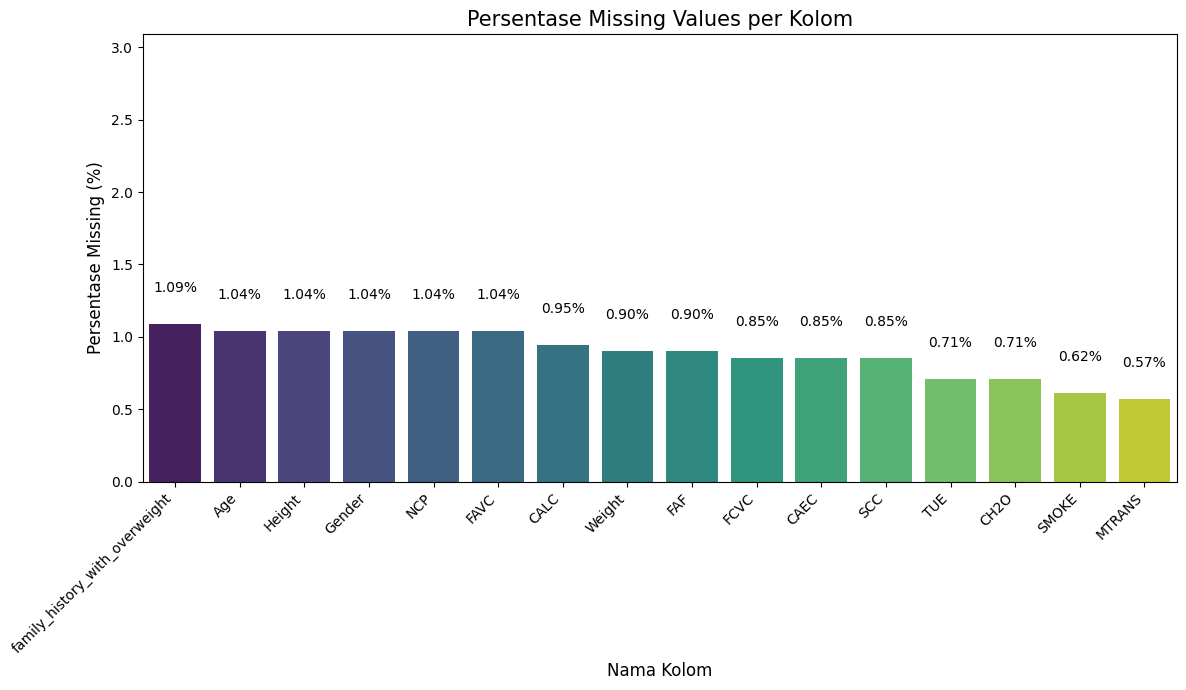

In [ ]:
#Visualisasi persentase missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, hue=missing_percentage.index, palette="viridis", legend=False)
plt.xticks(rotation=45, ha="right")
plt.title('Persentase Missing Values per Kolom', fontsize=15)
plt.xlabel('Nama Kolom', fontsize=12)
plt.ylabel('Persentase Missing (%)', fontsize=12)
plt.ylim(0, max(missing_percentage.values) + 2)

for i, v in enumerate(missing_percentage.values):
    plt.text(i, v + 0.2, f"{v:.2f}%", color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Kolom Numerik: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


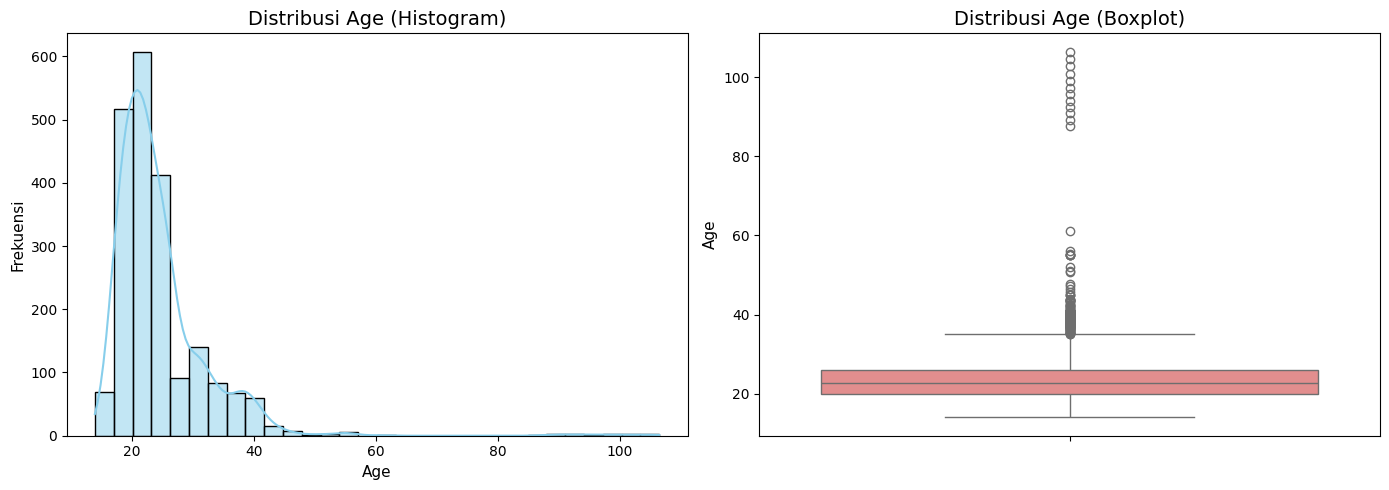

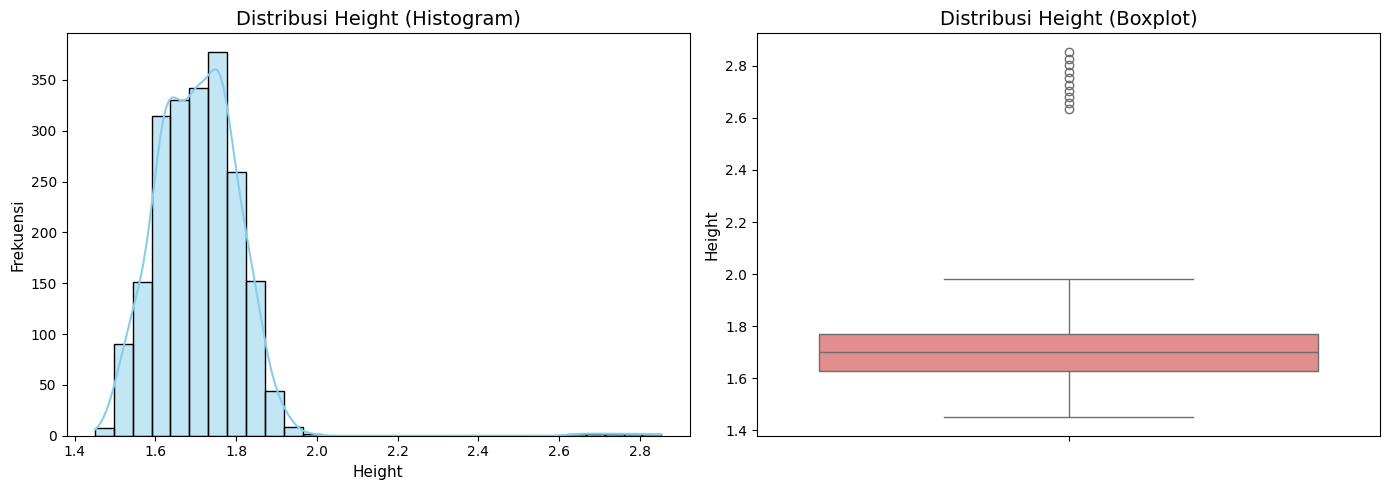

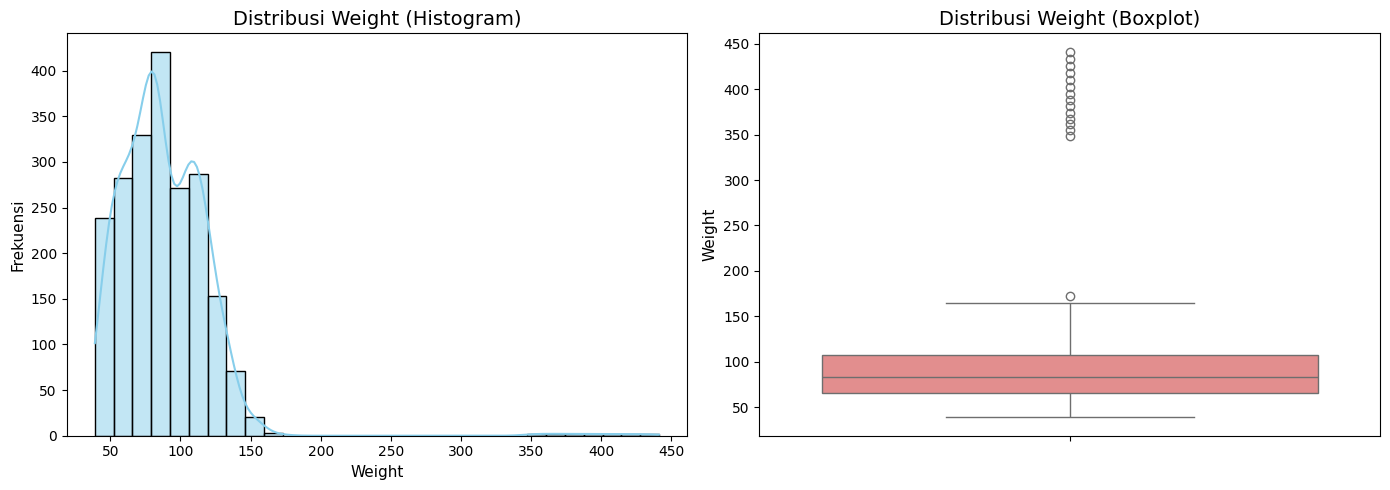

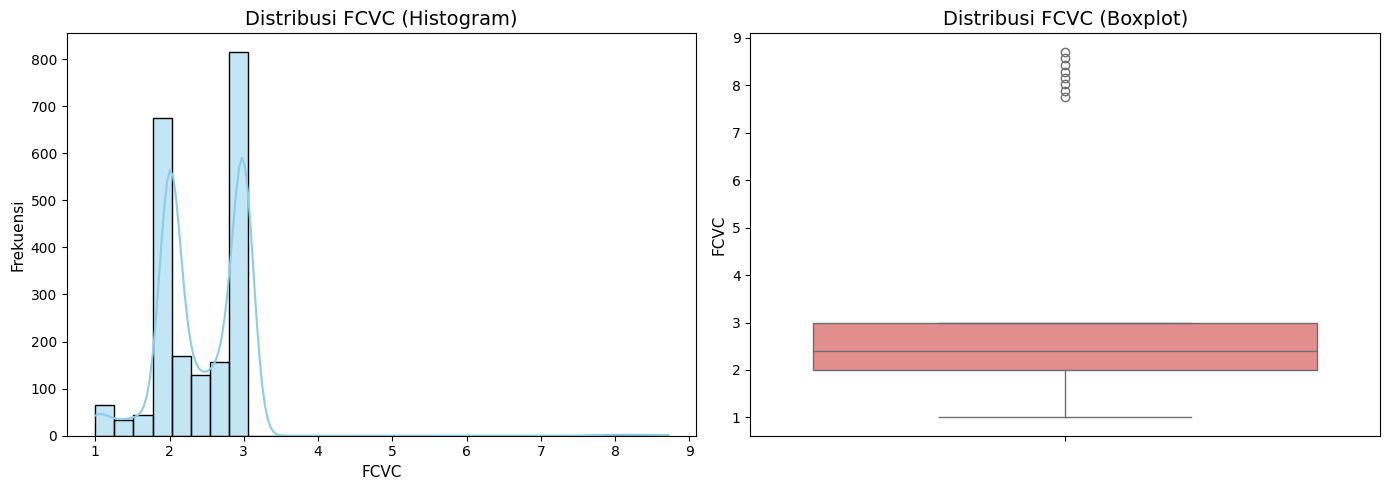

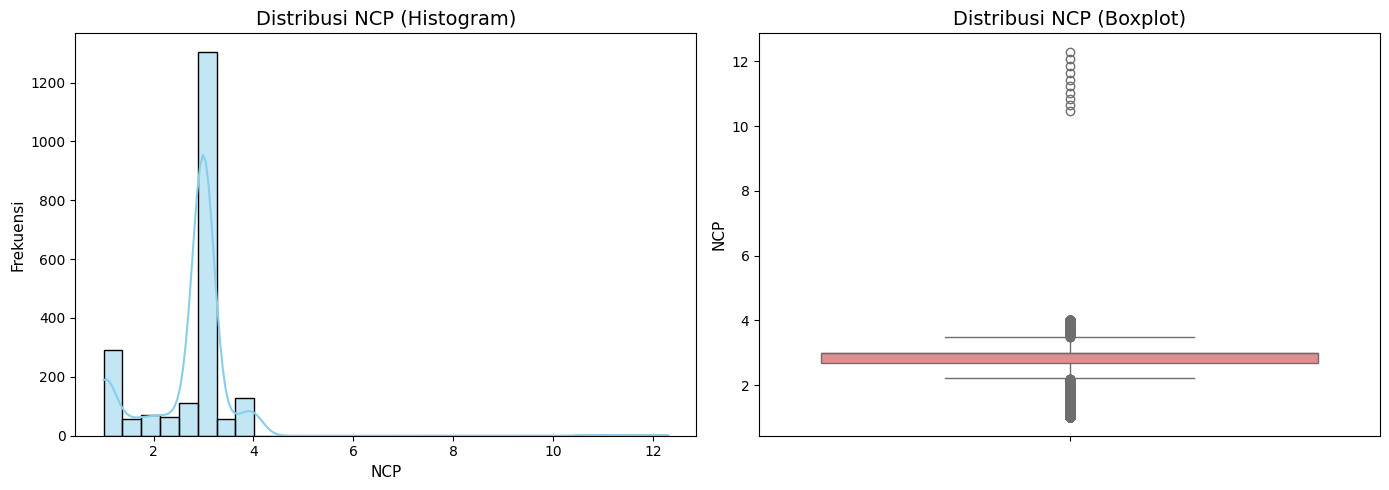

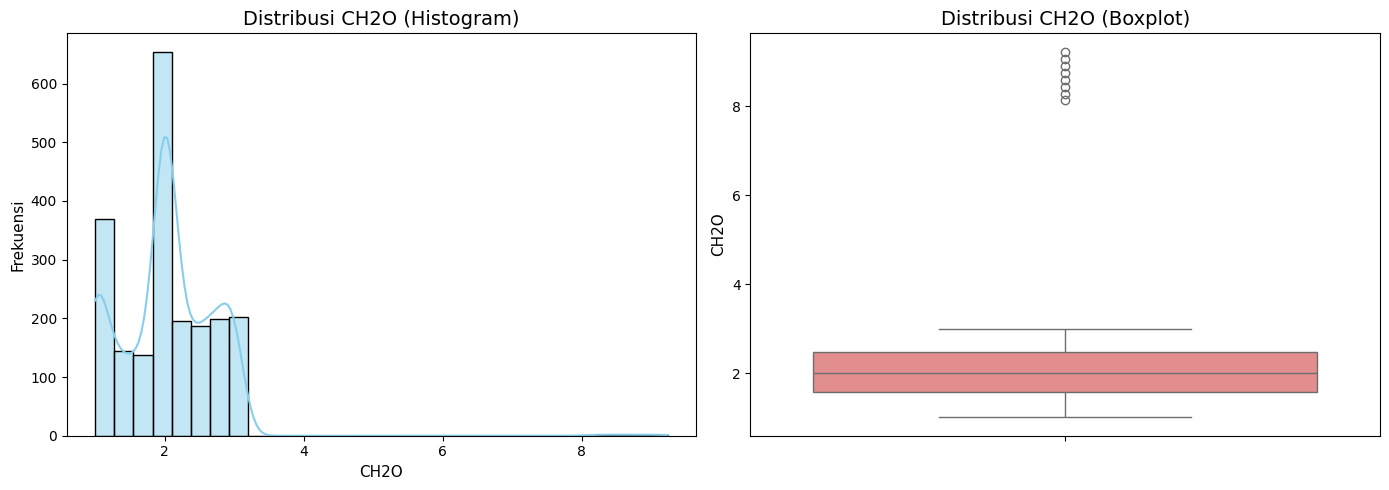

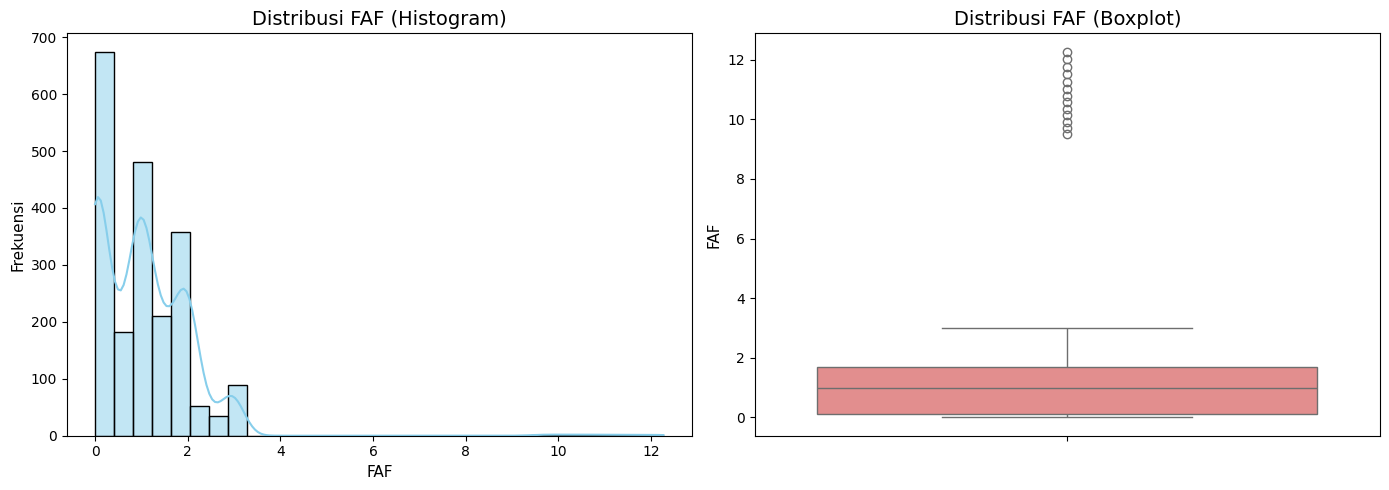

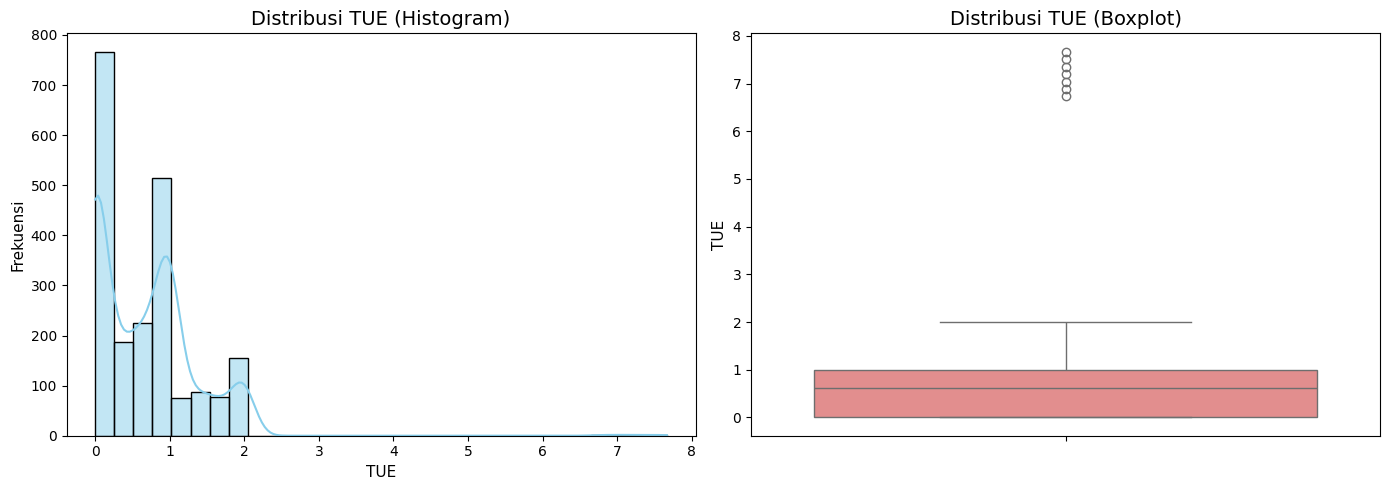

In [ ]:
#Visualisasi distribusi fitur numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Kolom Numerik: {numerical_cols}")

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col} (Histogram)', fontsize=14)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frekuensi', fontsize=11)

    #Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Distribusi {col} (Boxplot)', fontsize=14)
    plt.ylabel(col, fontsize=11)

    plt.tight_layout()
    plt.show()


Kolom Kategorikal (Fitur): ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


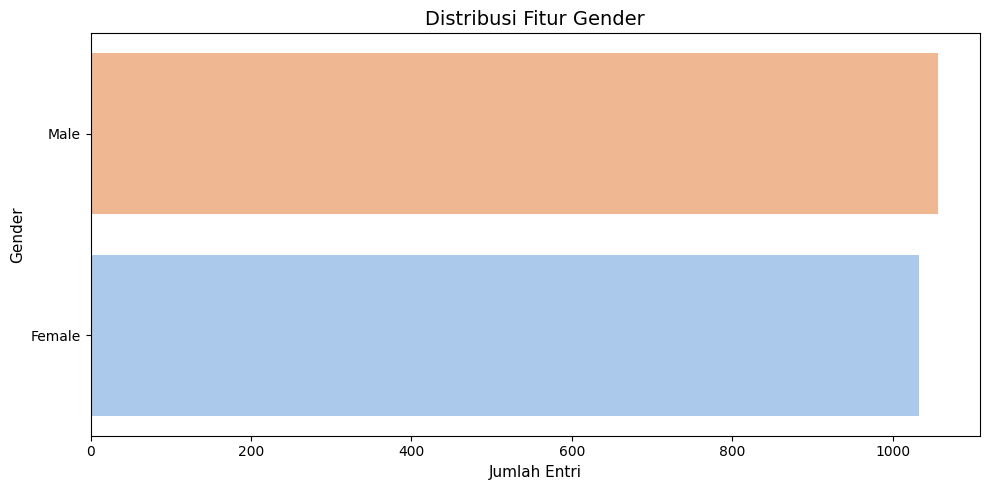


Frekuensi setiap kategori di kolom Gender:
Gender
Male      50.023685
Female    48.934154
NaN        1.042160
Name: proportion, dtype: float64


Gender
Male      1056
Female    1033
NaN         22
Name: count, dtype: int64
--------------------------------------------------


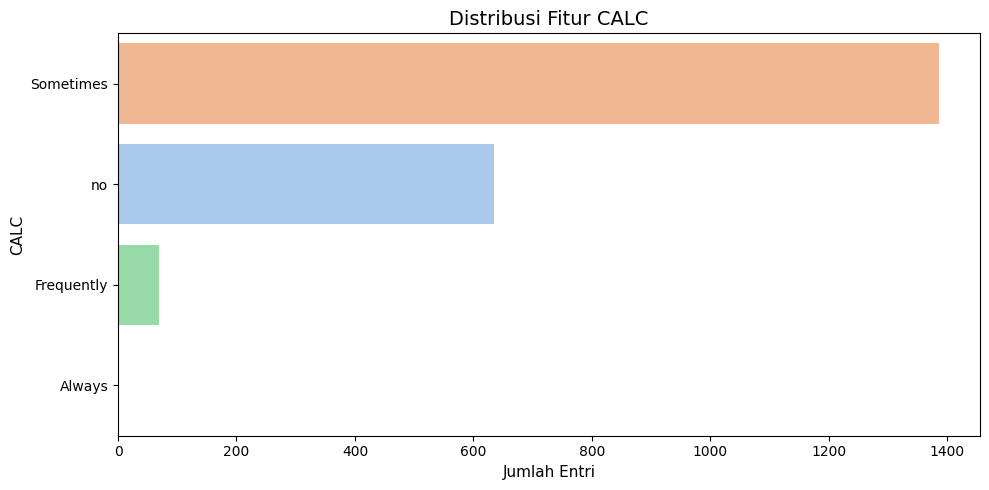


Frekuensi setiap kategori di kolom CALC:
CALC
Sometimes     65.656087
no            30.033160
Frequently     3.315964
NaN            0.947418
Always         0.047371
Name: proportion, dtype: float64


CALC
Sometimes     1386
no             634
Frequently      70
NaN             20
Always           1
Name: count, dtype: int64
--------------------------------------------------


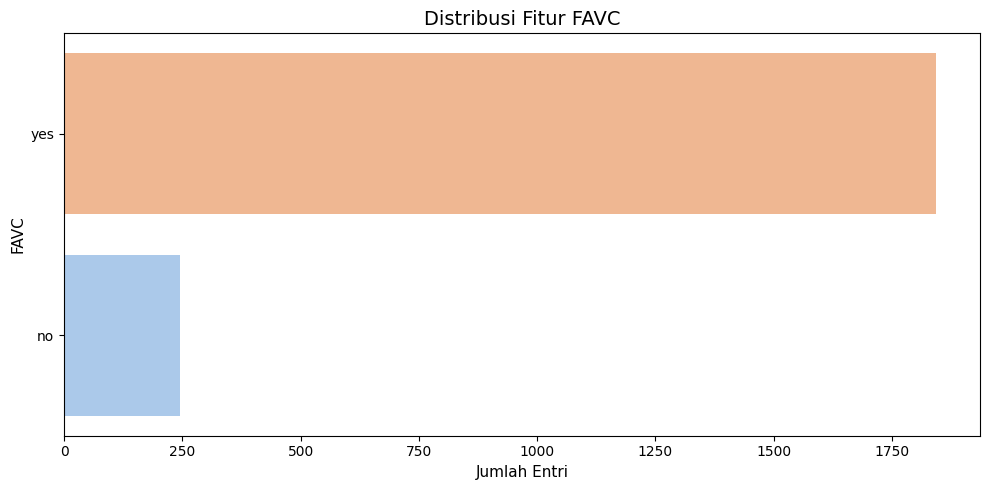


Frekuensi setiap kategori di kolom FAVC:
FAVC
yes    87.351966
no     11.605874
NaN     1.042160
Name: proportion, dtype: float64


FAVC
yes    1844
no      245
NaN      22
Name: count, dtype: int64
--------------------------------------------------


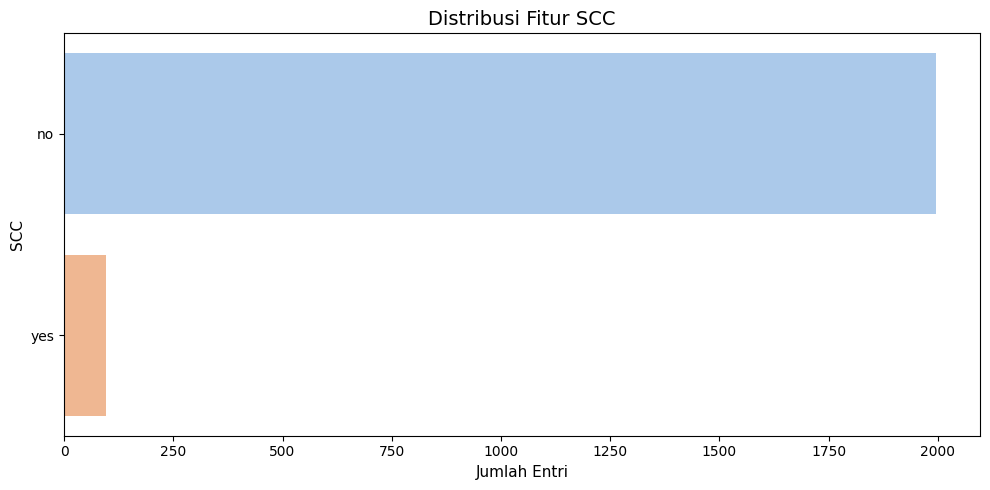


Frekuensi setiap kategori di kolom SCC:
SCC
no     94.599716
yes     4.547608
NaN     0.852676
Name: proportion, dtype: float64


SCC
no     1997
yes      96
NaN      18
Name: count, dtype: int64
--------------------------------------------------


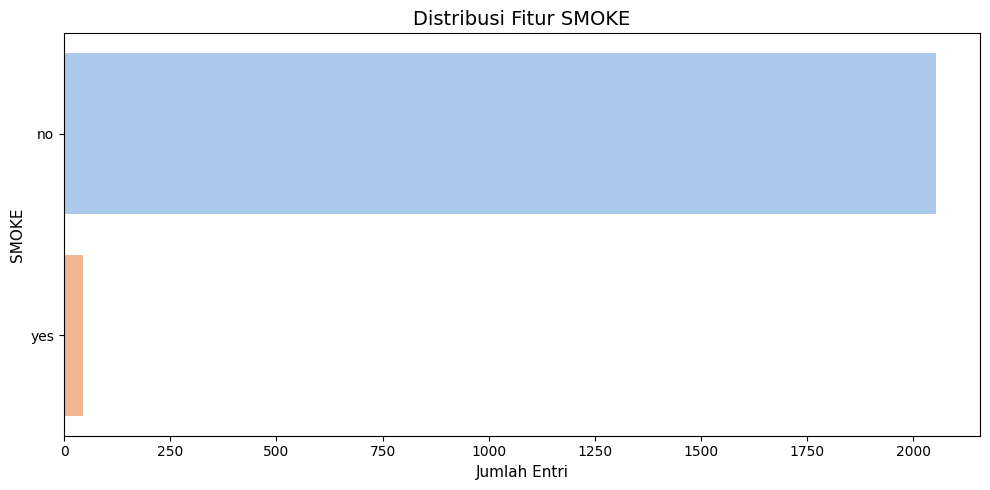


Frekuensi setiap kategori di kolom SMOKE:
SMOKE
no     97.299858
yes     2.084320
NaN     0.615822
Name: proportion, dtype: float64


SMOKE
no     2054
yes      44
NaN      13
Name: count, dtype: int64
--------------------------------------------------


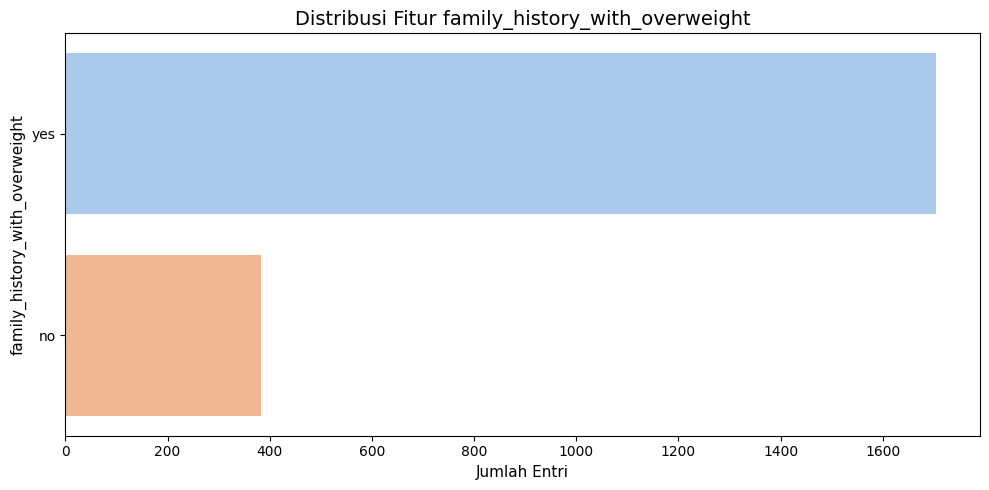


Frekuensi setiap kategori di kolom family_history_with_overweight:
family_history_with_overweight
yes    80.767409
no     18.143060
NaN     1.089531
Name: proportion, dtype: float64


family_history_with_overweight
yes    1705
no      383
NaN      23
Name: count, dtype: int64
--------------------------------------------------


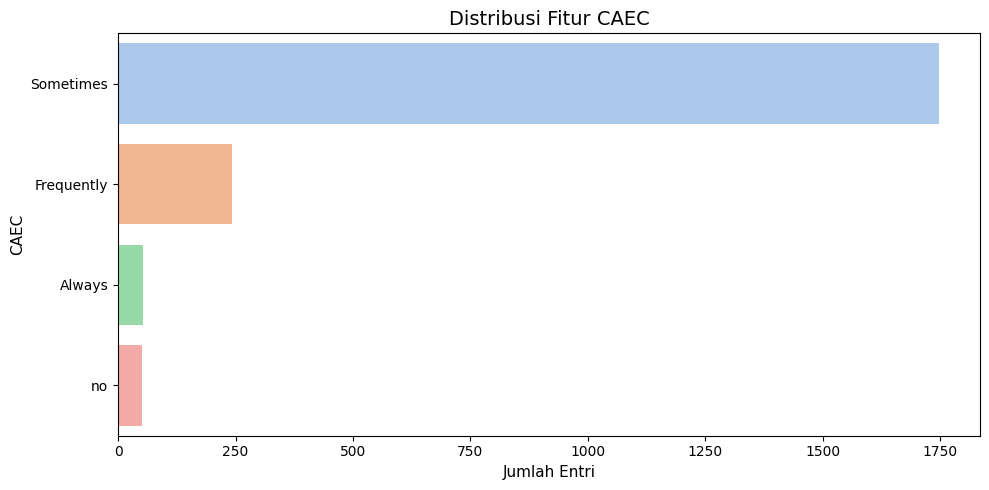


Frekuensi setiap kategori di kolom CAEC:
CAEC
Sometimes     82.756987
Frequently    11.463761
Always         2.510658
no             2.415917
NaN            0.852676
Name: proportion, dtype: float64


CAEC
Sometimes     1747
Frequently     242
Always          53
no              51
NaN             18
Name: count, dtype: int64
--------------------------------------------------


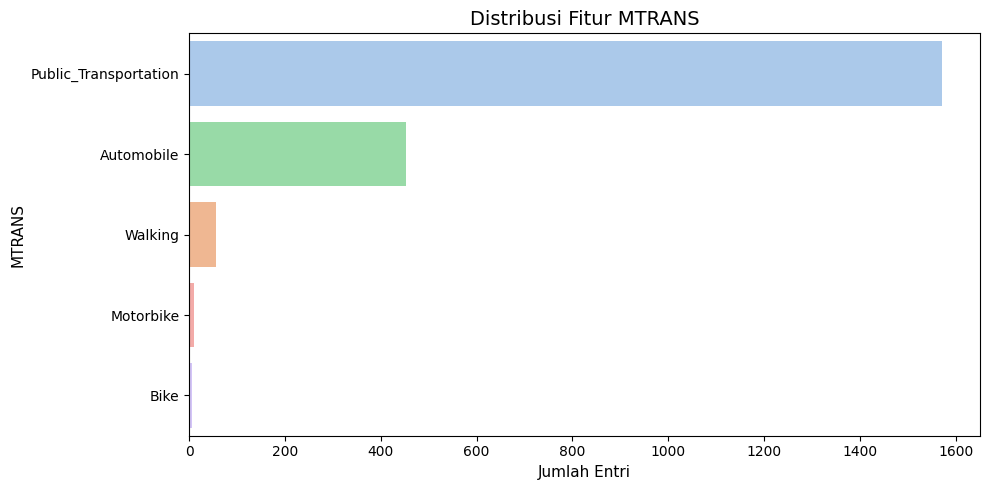


Frekuensi setiap kategori di kolom MTRANS:
MTRANS
Public_Transportation    74.467077
Automobile               21.459024
Walking                   2.652771
NaN                       0.568451
Motorbike                 0.521080
Bike                      0.331596
Name: proportion, dtype: float64


MTRANS
Public_Transportation    1572
Automobile                453
Walking                    56
NaN                        12
Motorbike                  11
Bike                        7
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
#Visualisasi distribusi fitur kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')
print(f"\nKolom Kategorikal (Fitur): {categorical_cols}")

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='pastel', hue=col, legend=False)
    plt.title(f'Distribusi Fitur {col}', fontsize=14)
    plt.xlabel('Jumlah Entri', fontsize=11)
    plt.ylabel(col, fontsize=11)
    plt.tight_layout()
    plt.show()

    print(f"\nFrekuensi setiap kategori di kolom {col}:")
    print(df[col].value_counts(normalize=True, dropna=False) * 100)
    print("\n")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)

In [ ]:
#Mengganti outlier dengan batas atas/bawah IQR
def cap_outliers_iqr(dataframe, column_name):

    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR_value = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value

    df_capped = dataframe.copy()
    df_capped[column_name] = np.where(df_capped[column_name] < lower_bound, lower_bound, df_capped[column_name])
    df_capped[column_name] = np.where(df_capped[column_name] > upper_bound, upper_bound, df_capped[column_name])

    print(f"Kolom '{column_name}':")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR_value:.2f}")
    print(f"  Batas Bawah (IQR): {lower_bound:.2f}")
    print(f"  Batas Atas (IQR): {upper_bound:.2f}")
    print(f"  Nilai min setelah capping: {df_capped[column_name].min():.2f}")
    print(f"  Nilai max setelah capping: {df_capped[column_name].max():.2f}")

    return df_capped[column_name]

df_cleaned = df.copy()

print("Proses Capping Outlier Menggunakan IQR")
for col in numerical_cols:
    if df_cleaned[col].isnull().all():
        continue
    df_cleaned[col] = cap_outliers_iqr(df_cleaned, col)
    print("-" * 30)

print("\nStatistik deskriptif SETELAH capping outlier:")
display(df_cleaned[numerical_cols].describe())

Proses Capping Outlier Menggunakan IQR
Kolom 'Age':
  Q1: 19.96, Q3: 26.00, IQR: 6.04
  Batas Bawah (IQR): 10.89
  Batas Atas (IQR): 35.07
  Nilai min setelah capping: 14.00
  Nilai max setelah capping: 35.07
------------------------------
Kolom 'Height':
  Q1: 1.63, Q3: 1.77, IQR: 0.14
  Batas Bawah (IQR): 1.42
  Batas Atas (IQR): 1.98
  Nilai min setelah capping: 1.45
  Nilai max setelah capping: 1.98
------------------------------
Kolom 'Weight':
  Q1: 66.00, Q3: 108.06, IQR: 42.06
  Batas Bawah (IQR): 2.92
  Batas Atas (IQR): 171.14
  Nilai min setelah capping: 39.00
  Nilai max setelah capping: 171.14
------------------------------
Kolom 'FCVC':
  Q1: 2.00, Q3: 3.00, IQR: 1.00
  Batas Bawah (IQR): 0.50
  Batas Atas (IQR): 4.50
  Nilai min setelah capping: 1.00
  Nilai max setelah capping: 4.50
------------------------------
Kolom 'NCP':
  Q1: 2.68, Q3: 3.00, IQR: 0.32
  Batas Bawah (IQR): 2.19
  Batas Atas (IQR): 3.49
  Nilai min setelah capping: 2.19
  Nilai max setelah capping: 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,23.957723,1.702980,87.124304,2.429286,2.846821,2.012154,1.031070,0.664444
std,5.328951,0.095133,26.936839,0.548602,0.384837,0.622792,0.881073,0.618717
min,14.000000,1.450000,39.000000,1.000000,2.188528,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,35.067115,1.980000,171.139341,4.500000,3.486884,3.851267,4.015516,2.500000



Distribusi Fitur Numerik SETELAH Capping Outlier


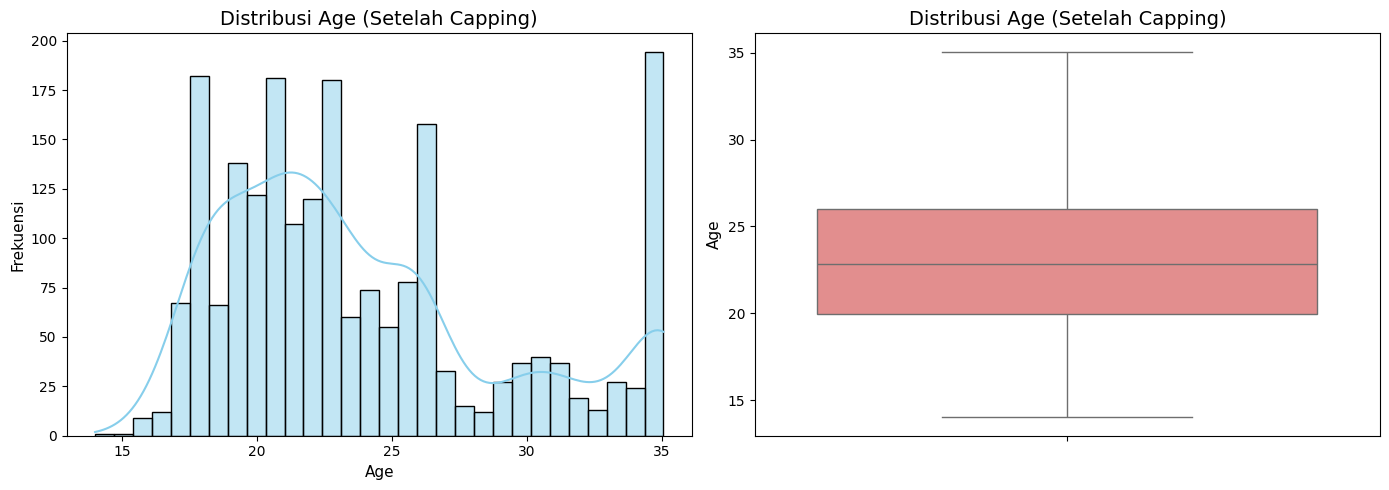

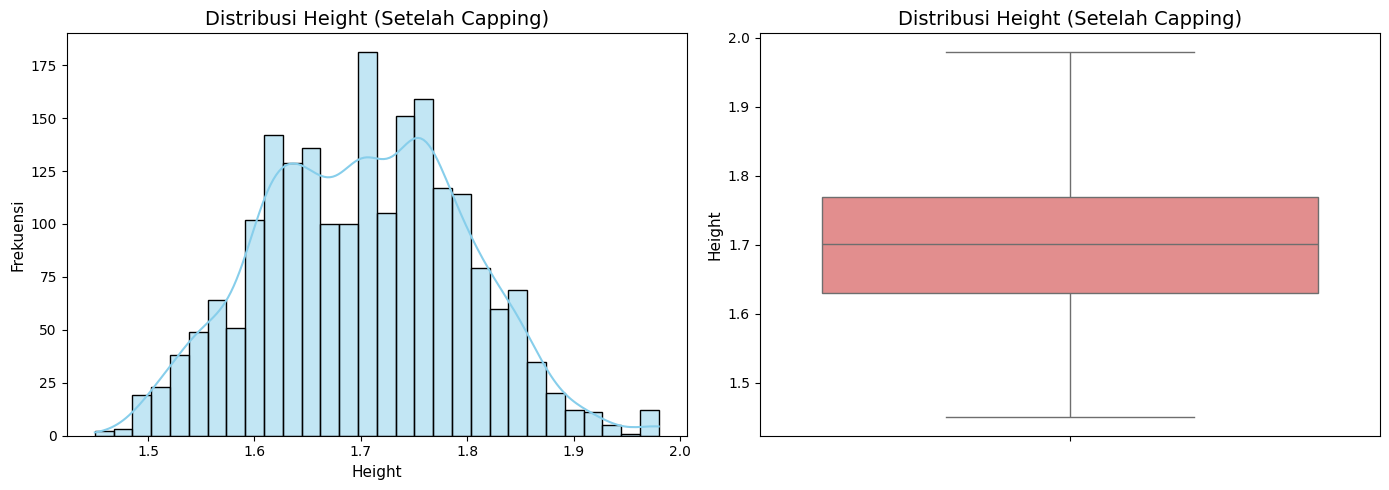

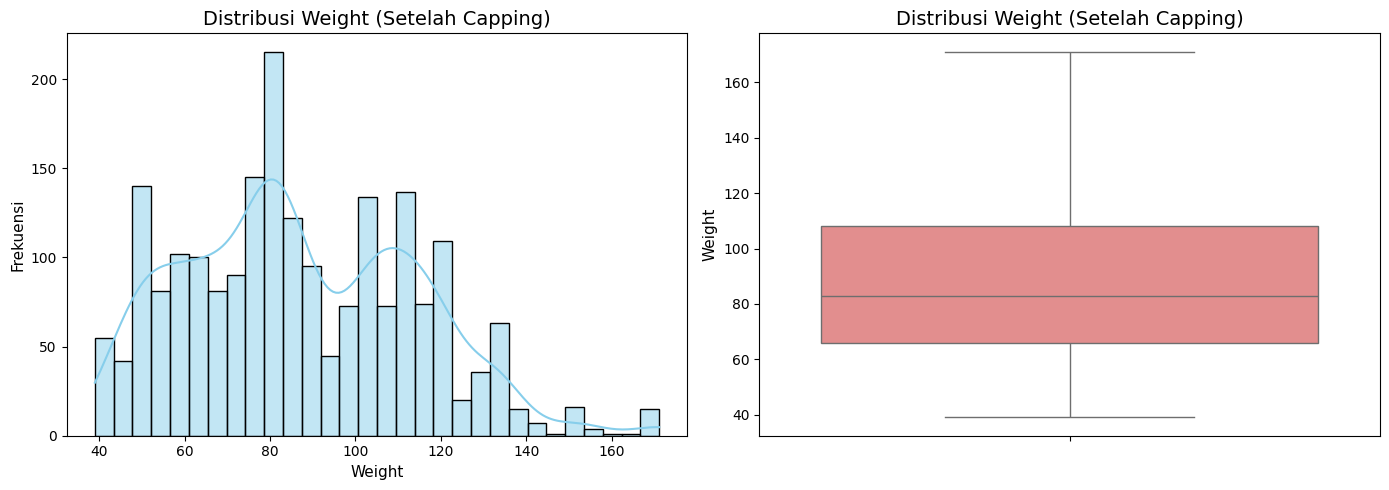

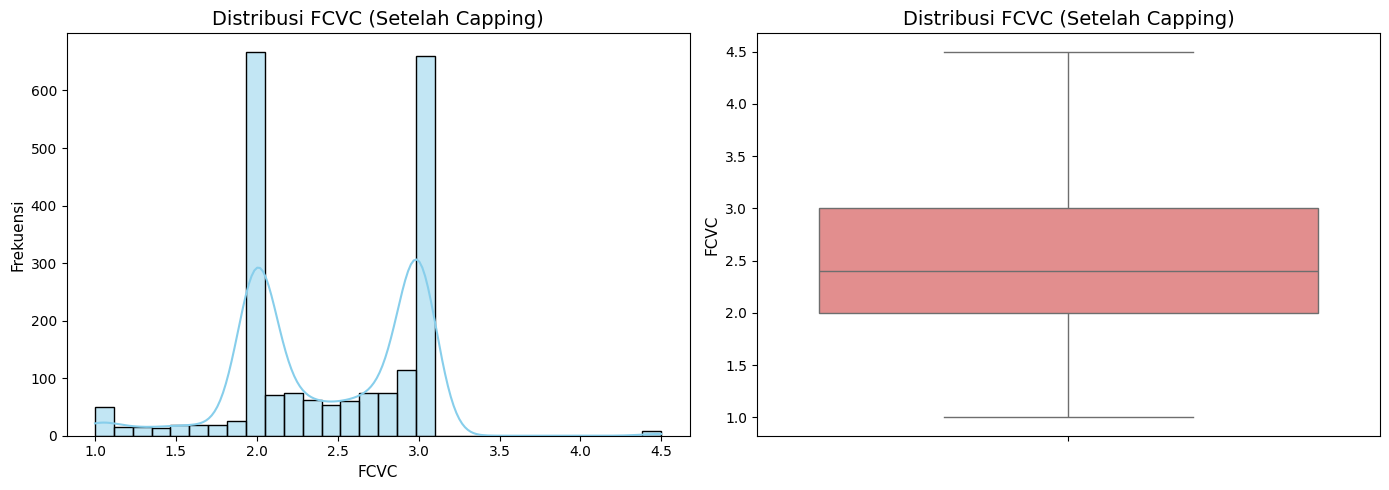

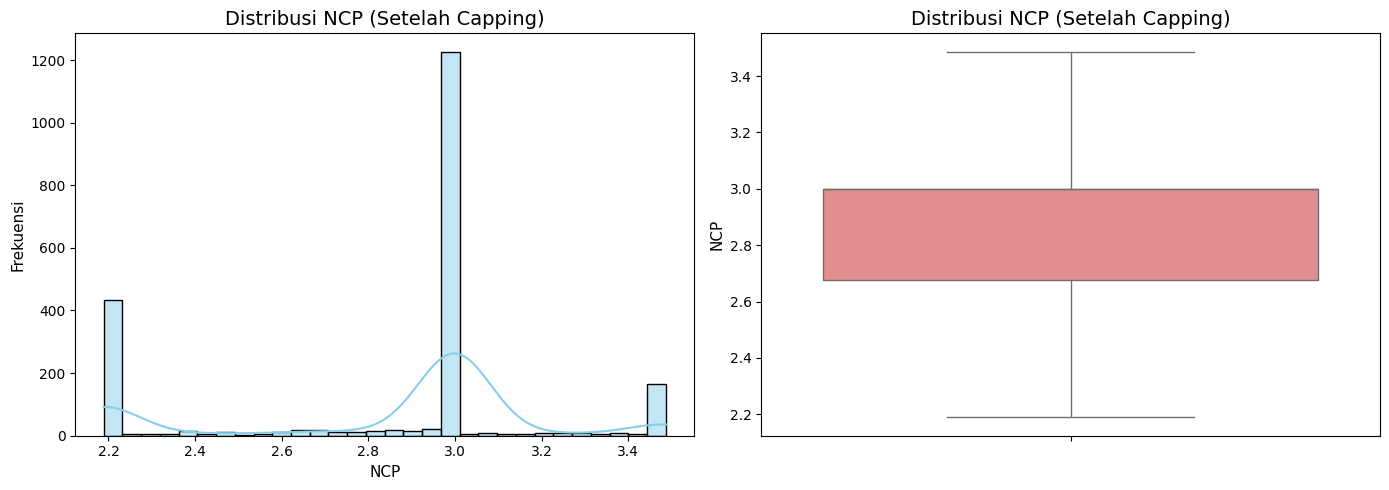

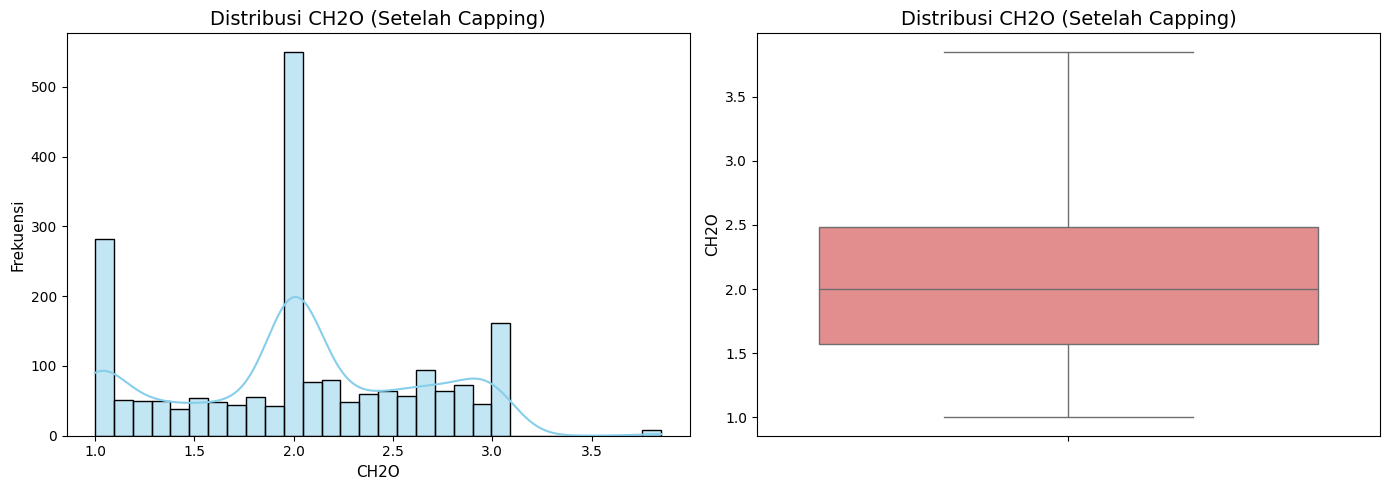

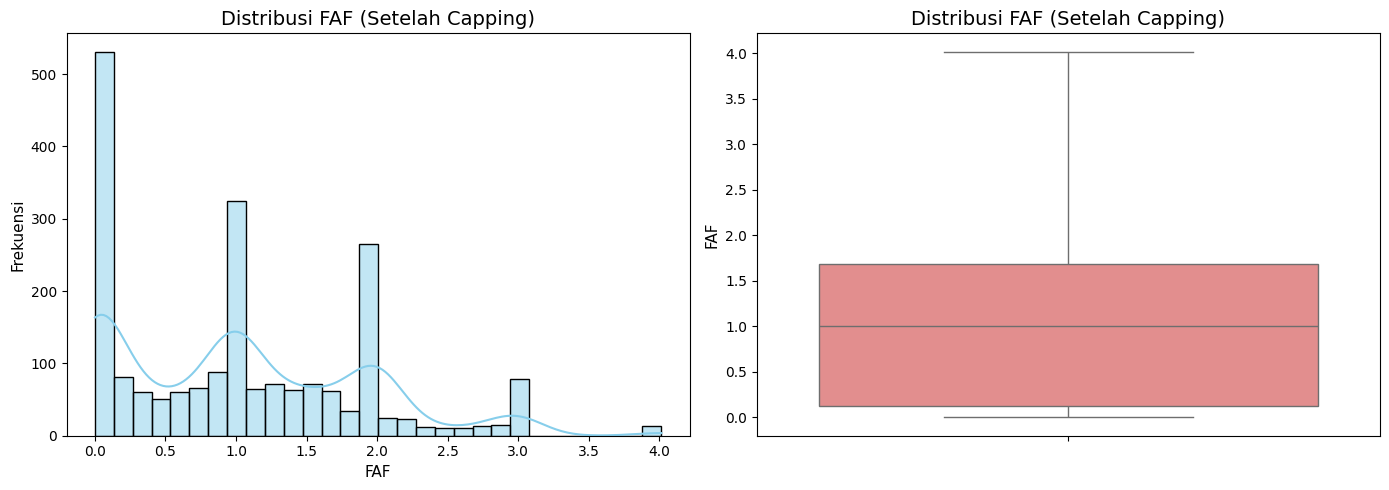

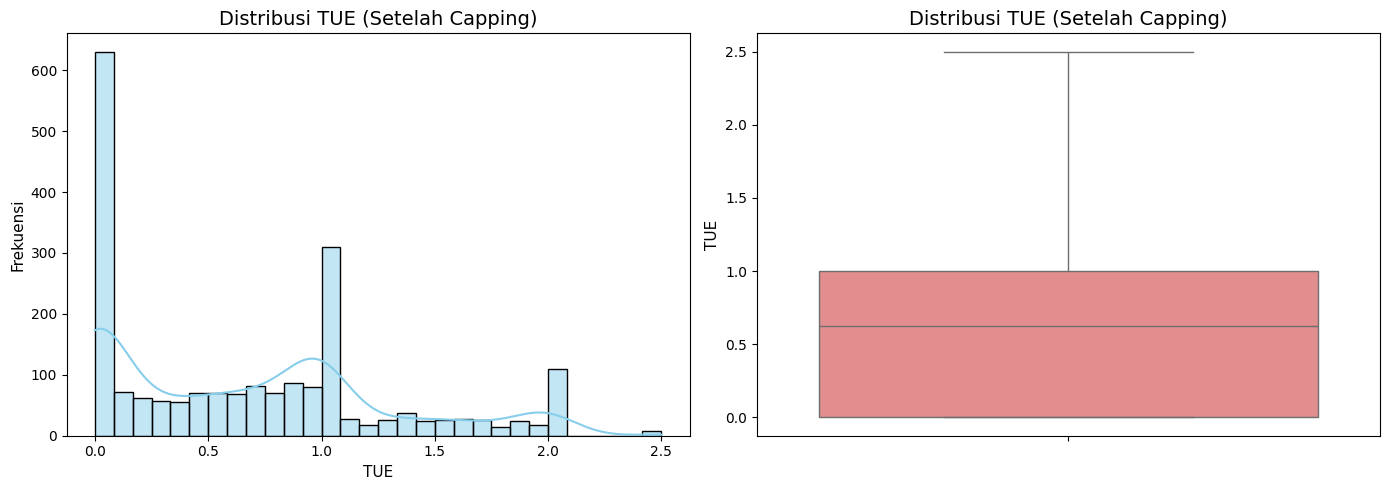

In [ ]:
#Visualisasi distribusi fitur numerik setelah capping outlier
print("\nDistribusi Fitur Numerik SETELAH Capping Outlier")
for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col} (Setelah Capping)', fontsize=14)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frekuensi', fontsize=11)

    #Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned[col], color='lightcoral')
    plt.title(f'Distribusi {col} (Setelah Capping)', fontsize=14)
    plt.ylabel(col, fontsize=11)

    plt.tight_layout()
    plt.show()

In [ ]:
#Penanganan Missing Value
#Kolom numerik yang akan diimputasi
numerical_cols_to_impute = [col for col in numerical_cols if df_cleaned[col].isnull().any()]
print(f"Kolom numerik dengan NaN yang akan diimputasi: {numerical_cols_to_impute}")

#Kolom kategorikal yang akan diimputasi
categorical_cols_to_impute = [col for col in categorical_cols if df_cleaned[col].isnull().any()]
print(f"Kolom kategorikal dengan NaN yang akan diimputasi: {categorical_cols_to_impute}")

Kolom numerik dengan NaN yang akan diimputasi: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Kolom kategorikal dengan NaN yang akan diimputasi: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


In [ ]:
#Imputasi fitur numerik dengan median
for col in numerical_cols_to_impute:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)
    print(f"  Kolom '{col}': NaN diisi dengan median ({median_val:.2f})")

#Imputasi fitur kategorikal dengan modus
for col in categorical_cols_to_impute:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_val, inplace=True)
    print(f"  Kolom '{col}': NaN diisi dengan modus ('{mode_val}')")

  Kolom 'Age': NaN diisi dengan median (22.81)
  Kolom 'Height': NaN diisi dengan median (1.70)
  Kolom 'Weight': NaN diisi dengan median (83.00)
  Kolom 'FCVC': NaN diisi dengan median (2.40)
  Kolom 'NCP': NaN diisi dengan median (3.00)
  Kolom 'CH2O': NaN diisi dengan median (2.00)
  Kolom 'FAF': NaN diisi dengan median (1.00)
  Kolom 'TUE': NaN diisi dengan median (0.63)
  Kolom 'Gender': NaN diisi dengan modus ('Male')
  Kolom 'CALC': NaN diisi dengan modus ('Sometimes')
  Kolom 'FAVC': NaN diisi dengan modus ('yes')
  Kolom 'SCC': NaN diisi dengan modus ('no')
  Kolom 'SMOKE': NaN diisi dengan modus ('no')
  Kolom 'family_history_with_overweight': NaN diisi dengan modus ('yes')
  Kolom 'CAEC': NaN diisi dengan modus ('Sometimes')
  Kolom 'MTRANS': NaN diisi dengan modus ('Public_Transportation')


<ipython-input-18-3558660112>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
<ipython-input-18-3558660112>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
#Verifikasi Missing Value
print("\nJumlah missing values setelah imputasi:")
print(df_cleaned.isnull().sum())

print("\nInformasi umum dataset setelah imputasi:")
df_cleaned.info()


Jumlah missing values setelah imputasi:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Informasi umum dataset setelah imputasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1

In [ ]:
#Mengubah kolom kategorikal ke numerik dengan Label Encoding
df_encoded_le = df_cleaned.copy()
le = LabelEncoder()

cols_for_standard_le = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'MTRANS']
for col in cols_for_standard_le:
    df_encoded_le[col] = le.fit_transform(df_encoded_le[col])
    print(f"Kolom '{col}' di-encode. Kelas: {le.classes_} -> {np.unique(df_encoded_le[col])}")

#Pemetaan manual untuk Fitur Ordinal (CALC, CAEC)
calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df_encoded_le['CALC'] = df_encoded_le['CALC'].map(calc_mapping)
print(f"\nKolom 'CALC' di-encode dengan pemetaan manual.")
print(f"  Nilai unik setelah encode: {df_encoded_le['CALC'].unique()}")

caec_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df_encoded_le['CAEC'] = df_encoded_le['CAEC'].map(caec_mapping)
print(f"Kolom 'CAEC' di-encode dengan pemetaan manual.")
print(f"  Nilai unik setelah encode: {df_encoded_le['CAEC'].unique()}")

df_encoded_le['NObeyesdad_encoded'] = le.fit_transform(df_encoded_le['NObeyesdad'])
target_mapping_le = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"\nKolom target 'NObeyesdad' di-encode menjadi 'NObeyesdad_encoded'.")
print(f"  Pemetaan Target: {target_mapping_le}")

df_encoded_le.drop(columns=['NObeyesdad'], inplace=True)

print("\nDataFrame setelah Label Encoding untuk semua fitur kategorikal:")
display(df_encoded_le.head())
df_encoded_le.info()

Kolom 'Gender' di-encode. Kelas: ['Female' 'Male'] -> [0 1]
Kolom 'FAVC' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'SCC' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'SMOKE' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'family_history_with_overweight' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'MTRANS' di-encode. Kelas: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking'] -> [0 1 2 3 4]

Kolom 'CALC' di-encode dengan pemetaan manual.
  Nilai unik setelah encode: [0 1 2 3]
Kolom 'CAEC' di-encode dengan pemetaan manual.
  Nilai unik setelah encode: [1 2 3 0]

Kolom target 'NObeyesdad' di-encode menjadi 'NObeyesdad_encoded'.
  Pemetaan Target: {'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}

DataFrame setelah Label Encoding untuk semua fitur kategorikal:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad_encoded
0,21.0,0,1.62,64.0,0,0,2.0,3.000000,0,0,2.0,1,0.0,1.0,1,3,1
1,21.0,0,1.52,56.0,1,0,3.0,3.000000,1,1,3.0,1,3.0,0.0,1,3,1
2,23.0,1,1.80,77.0,2,0,2.0,3.000000,0,0,2.0,1,2.0,1.0,1,3,1
3,27.0,1,1.80,87.0,2,0,3.0,3.000000,0,0,2.0,0,2.0,0.0,1,4,5
4,22.0,1,1.78,89.8,1,0,2.0,2.188528,0,0,2.0,0,0.0,0.0,1,3,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

In [ ]:
#Cek duplikat
duplicate_rows = df_encoded_le.duplicated()
duplicate_count = df_encoded_le.duplicated().sum()

print("Jumlah duplikat:", duplicate_count)
print("Baris duplikat: ")
df_encoded_le[df_encoded_le.duplicated(keep=False)]

Jumlah duplikat: 21
Baris duplikat: 


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad_encoded
97,21.0,0,1.52,42.0,1,0,3.0,2.188528,0,0,1.0,0,0.000000,0.0,2,3,0
98,21.0,0,1.52,42.0,1,0,3.0,2.188528,0,0,1.0,0,0.000000,0.0,2,3,0
145,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
174,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
179,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
184,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
282,18.0,0,1.62,55.0,0,1,2.0,3.000000,0,0,1.0,1,1.000000,1.0,2,3,1
295,16.0,0,1.66,58.0,0,0,2.0,2.188528,0,0,1.0,0,0.000000,1.0,1,4,1
309,16.0,0,1.66,58.0,0,0,2.0,2.188528,0,0,1.0,0,0.000000,1.0,1,4,1
443,18.0,1,1.72,53.0,1,1,2.0,3.000000,0,0,2.0,1,0.000000,2.0,1,3,0


In [ ]:
#Handling duplikat (dihapus)
df_encoded_le = df_encoded_le.drop_duplicates()

duplicate_count_after = df_encoded_le.duplicated().sum()
print("Jumlah duplikat:", duplicate_count_after)

Jumlah duplikat: 0


In [ ]:
# Normalisasi Data (Min-Max Scaling)
X = df_encoded_le.drop('NObeyesdad_encoded', axis=1)
y = df_encoded_le['NObeyesdad_encoded']

print("Dimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

scaler = MinMaxScaler()

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

print("\nBeberapa baris pertama dari fitur setelah Min-Max Scaling:")
display(X_scaled.head())

print("\nStatistik deskriptif dari fitur setelah Min-Max Scaling:")
display(X_scaled.describe())

Dimensi Fitur (X): (2090, 16)
Dimensi Target (y): (2090,)

Beberapa baris pertama dari fitur setelah Min-Max Scaling:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.332271,0.0,0.320755,0.189194,0.000000,0.0,0.285714,0.625,0.0,0.0,0.350721,1.0,0.000000,0.4,0.333333,0.75
1,0.332271,0.0,0.132075,0.128652,0.333333,0.0,0.571429,0.625,1.0,1.0,0.701443,1.0,0.747102,0.0,0.333333,0.75
2,0.427206,1.0,0.660377,0.287575,0.666667,0.0,0.285714,0.625,0.0,0.0,0.350721,1.0,0.498068,0.4,0.333333,0.75
3,0.617075,1.0,0.660377,0.363253,0.666667,0.0,0.571429,0.625,0.0,0.0,0.350721,0.0,0.498068,0.0,0.333333,1.00
4,0.379739,1.0,0.622642,0.384443,0.333333,0.0,0.285714,0.000,0.0,0.0,0.350721,0.0,0.000000,0.0,0.333333,0.75



Statistik deskriptif dari fitur setelah Min-Max Scaling:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,0.473733,0.508134,0.478896,0.365657,0.244179,0.883732,0.408974,0.512460,0.045933,0.021053,0.353654,0.825359,0.256896,0.267570,0.382137,0.591388
std,0.252337,0.500053,0.178460,0.203063,0.171888,0.320623,0.156304,0.292737,0.209390,0.143594,0.216053,0.379751,0.218631,0.246296,0.153189,0.315200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.284004,0.000000,0.342850,0.204330,0.000000,1.000000,0.285714,0.414756,0.000000,0.000000,0.207440,1.000000,0.032538,0.000000,0.333333,0.750000
50%,0.418408,1.000000,0.474121,0.332982,0.333333,1.000000,0.399224,0.625000,0.000000,0.000000,0.350721,1.000000,0.249034,0.250146,0.333333,0.750000
75%,0.569608,1.000000,0.603774,0.522771,0.333333,1.000000,0.571429,0.625000,0.000000,0.000000,0.512552,1.000000,0.419211,0.400000,0.333333,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Pembagian Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

print("\nDistribusi kelas target di y_train:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribusi kelas target di y_test:")
print(y_test.value_counts(normalize=True) * 100)

Dimensi X_train: (1672, 16)
Dimensi X_test: (418, 16)
Dimensi y_train: (1672,)
Dimensi y_test: (418,)

Distribusi kelas target di y_train:
NObeyesdad_encoded
2    16.806220
4    15.490431
3    14.234450
6    13.875598
1    13.576555
5    13.217703
0    12.799043
Name: proportion, dtype: float64

Distribusi kelas target di y_test:
NObeyesdad_encoded
2    16.746411
4    15.550239
3    14.114833
6    13.875598
1    13.636364
5    13.157895
0    12.918660
Name: proportion, dtype: float64


Melatih model Decision Tree...
Waktu pelatihan Decision Tree: 0.0400 detik
Pelatihan model Decision Tree selesai.
Waktu prediksi Decision Tree: 0.0114 detik

Prediksi pada data test:
[2 3 4 5 2 0 2 4 4 1 6 6 5 6 3 2 2 1 2 1]
Nilai aktual pada data test:
[3 3 4 5 6 0 2 4 4 1 6 6 6 6 3 2 2 1 2 1]
Akurasi Decision Tree: 0.9139

Laporan Klasifikasi Decision Tree:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        54
      Normal_Weight       0.81      0.89      0.85        57
     Obesity_Type_I       0.90      0.91      0.91        70
    Obesity_Type_II       0.96      0.93      0.95        59
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.88      0.78      0.83        55
Overweight_Level_II       0.88      0.91      0.90        58

           accuracy                           0.91       418
          macro avg       0.91      0.91      0.91       418
       weighted avg       

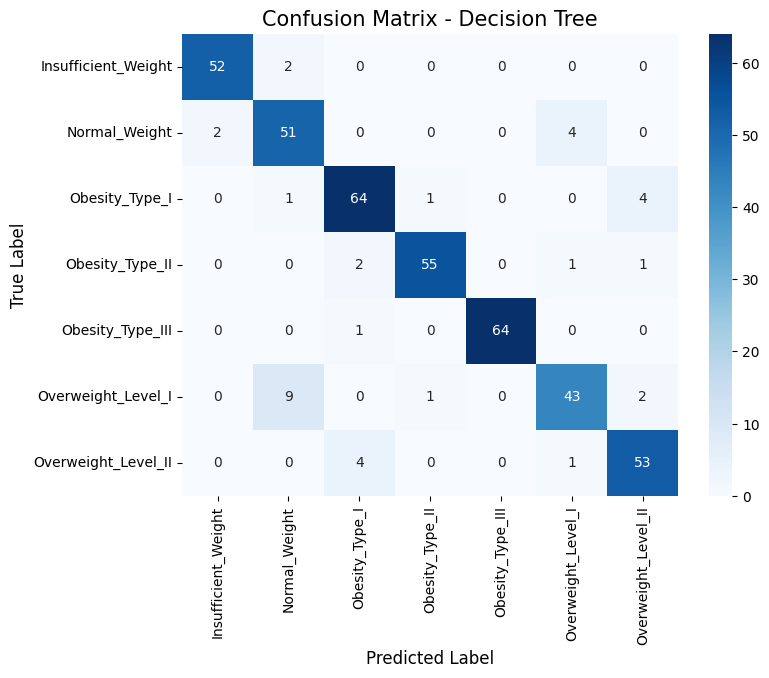

In [ ]:
#Melatih Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import time

dt_model = DecisionTreeClassifier(random_state=42)

print("Melatih model Decision Tree...")
start_time_train_dt = time.time()
dt_model.fit(X_train, y_train)
end_time_train_dt = time.time()
training_time_dt = end_time_train_dt - start_time_train_dt
print(f"Waktu pelatihan Decision Tree: {training_time_dt:.4f} detik")
print("Pelatihan model Decision Tree selesai.")

start_time_pred_dt = time.time()
y_pred_dt = dt_model.predict(X_test)
end_time_pred_dt = time.time()
prediction_time_dt = end_time_pred_dt - start_time_pred_dt
print(f"Waktu prediksi Decision Tree: {prediction_time_dt:.4f} detik")

print("\nPrediksi pada data test:")
print(y_pred_dt[:20])
print("Nilai aktual pada data test:")
print(y_test.values[:20])

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt:.4f}")

print("\nLaporan Klasifikasi Decision Tree:")
class_names_dt = [key for key, val in sorted(target_mapping_le.items(), key=lambda item: item[1])]
print(classification_report(y_test, y_pred_dt, target_names=class_names_dt, zero_division=0))

print("\nConfusion Matrix Decision Tree:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_dt, yticklabels=class_names_dt)
plt.title('Confusion Matrix - Decision Tree', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

model_performance = {}
model_performance['Decision Tree'] = {
    'Akurasi': accuracy_dt,
    'F1_Macro': f1_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'F1_Weighted': f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Precision_Weighted': precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Recall_Weighted': recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
}
model_performance['Decision Tree']['Training Time (s)'] = training_time_dt
model_performance['Decision Tree']['Prediction Time (s)'] = prediction_time_dt

Melatih model Random Forest...
Waktu pelatihan Random Forest: 0.9786 detik
Pelatihan selesai.
Waktu prediksi Random Forest: 0.0917 detik
Akurasi Random Forest: 0.9617

Laporan Klasifikasi Random Forest:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        54
      Normal_Weight       0.89      0.96      0.92        57
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       1.00      0.98      0.99        59
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.93      0.93      0.93        55
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.96       418
          macro avg       0.96      0.96      0.96       418
       weighted avg       0.96      0.96      0.96       418



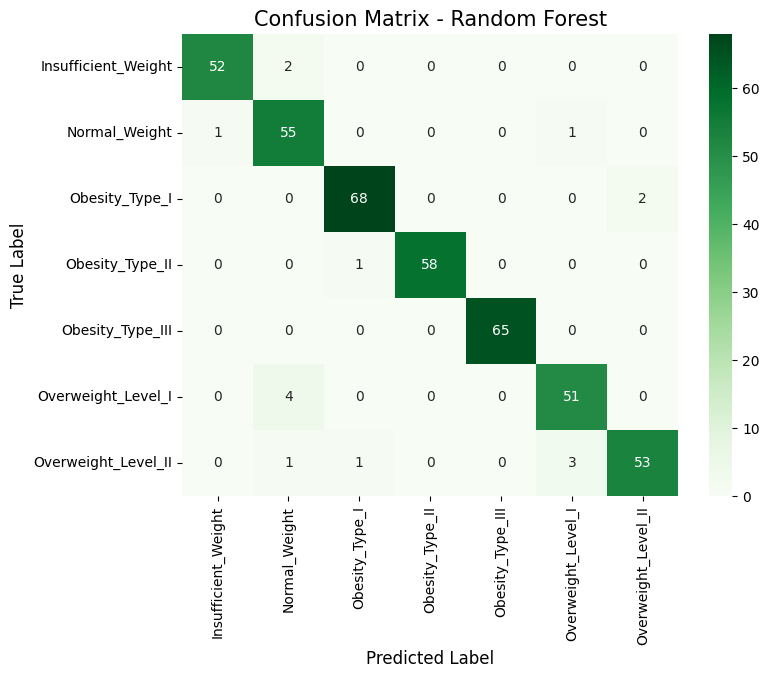

In [ ]:
#Melatih Model Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Melatih model Random Forest...")
start_time_train_rf = time.time()
rf_model.fit(X_train, y_train)
end_time_train_rf = time.time()
training_time_rf = end_time_train_rf - start_time_train_rf
print(f"Waktu pelatihan Random Forest: {training_time_rf:.4f} detik")
print("Pelatihan selesai.")

start_time_pred_rf = time.time()
y_pred_rf = rf_model.predict(X_test)
end_time_pred_rf = time.time()
prediction_time_rf = end_time_pred_rf - start_time_pred_rf
print(f"Waktu prediksi Random Forest: {prediction_time_rf:.4f} detik")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf:.4f}")

print("\nLaporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=class_names_dt, zero_division=0))

model_performance['Random Forest'] = {
    'Akurasi': accuracy_rf,
    'F1_Macro': f1_score(y_test, y_pred_rf, average='macro', zero_division=0),
    'F1_Weighted': f1_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    'Precision_Weighted': precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    'Recall_Weighted': recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
}
model_performance['Random Forest']['Training Time (s)'] = training_time_rf
model_performance['Random Forest']['Prediction Time (s)'] = prediction_time_rf

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=class_names_dt, yticklabels=class_names_dt)
plt.title('Confusion Matrix - Random Forest', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

Melatih model K-Nearest Neighbors...
Waktu pelatihan KNN: 0.0038 detik
Pelatihan selesai.
Waktu prediksi KNN: 0.0646 detik
Akurasi KNN: 0.7847

Laporan Klasifikasi KNN:
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.91      0.84        54
      Normal_Weight       0.56      0.44      0.49        57
     Obesity_Type_I       0.75      0.89      0.81        70
    Obesity_Type_II       0.86      0.95      0.90        59
   Obesity_Type_III       0.98      1.00      0.99        65
 Overweight_Level_I       0.71      0.64      0.67        55
Overweight_Level_II       0.75      0.62      0.68        58

           accuracy                           0.78       418
          macro avg       0.77      0.78      0.77       418
       weighted avg       0.78      0.78      0.78       418



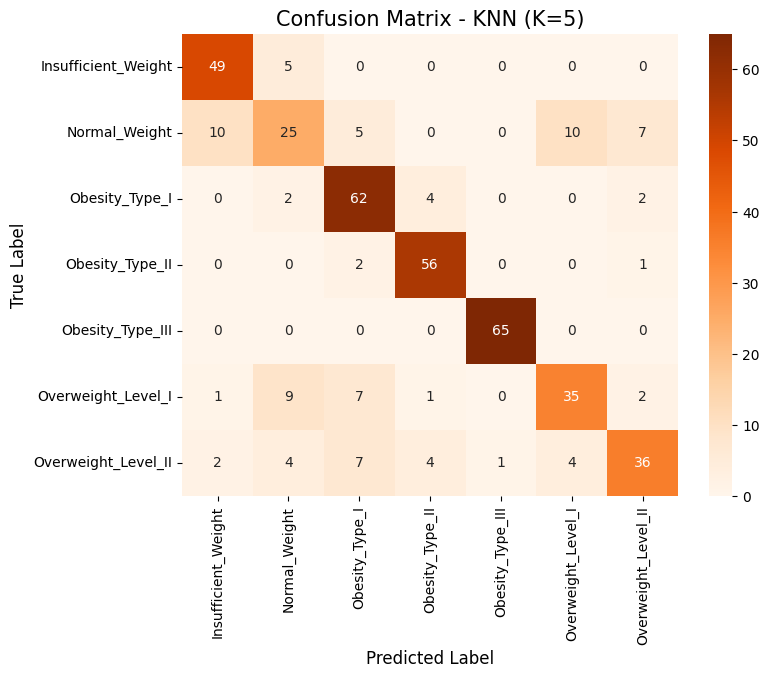

In [ ]:
#Melatih Model K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

print("Melatih model K-Nearest Neighbors...")
start_time_train_knn = time.time()
knn_model.fit(X_train, y_train)
end_time_train_knn = time.time()
training_time_knn = end_time_train_knn - start_time_train_knn
print(f"Waktu pelatihan KNN: {training_time_knn:.4f} detik")
print("Pelatihan selesai.")

start_time_pred_knn = time.time()
y_pred_knn = knn_model.predict(X_test)
end_time_pred_knn = time.time()
prediction_time_knn = end_time_pred_knn - start_time_pred_knn
print(f"Waktu prediksi KNN: {prediction_time_knn:.4f} detik")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {accuracy_knn:.4f}")

print("\nLaporan Klasifikasi KNN:")
print(classification_report(y_test, y_pred_knn, target_names=class_names_dt, zero_division=0))

model_performance['KNN'] = {
    'Akurasi': accuracy_knn,
    'F1_Macro': f1_score(y_test, y_pred_knn, average='macro', zero_division=0),
    'F1_Weighted': f1_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Precision_Weighted': precision_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Recall_Weighted': recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
}
model_performance['KNN']['Training Time (s)'] = training_time_knn
model_performance['KNN']['Prediction Time (s)'] = prediction_time_knn

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names_dt, yticklabels=class_names_dt)
plt.title('Confusion Matrix - KNN (K=5)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

Melatih model Support Vector Machine (SVM)...
Waktu pelatihan SVM: 0.0964 detik
Pelatihan selesai.
Waktu prediksi SVM: 0.0309 detik
Akurasi SVM: 0.8206

Laporan Klasifikasi SVM:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.87      0.90        54
      Normal_Weight       0.67      0.60      0.63        57
     Obesity_Type_I       0.81      0.86      0.83        70
    Obesity_Type_II       0.90      0.95      0.93        59
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.68      0.78      0.73        55
Overweight_Level_II       0.75      0.67      0.71        58

           accuracy                           0.82       418
          macro avg       0.82      0.82      0.82       418
       weighted avg       0.82      0.82      0.82       418



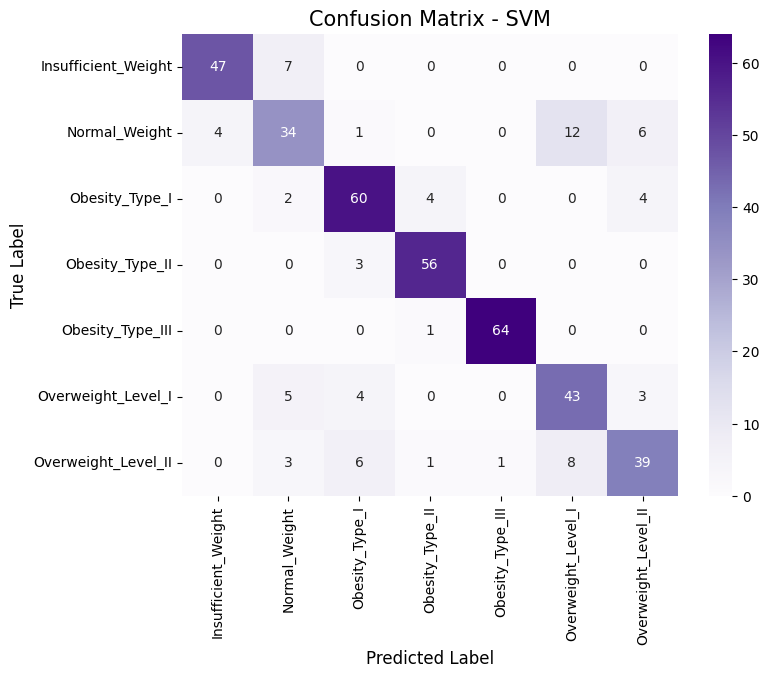

In [ ]:
#Melatih Model Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

print("Melatih model Support Vector Machine (SVM)...")
start_time_train_svm = time.time()
svm_model.fit(X_train, y_train)
end_time_train_svm = time.time()
training_time_svm = end_time_train_svm - start_time_train_svm
print(f"Waktu pelatihan SVM: {training_time_svm:.4f} detik")
print("Pelatihan selesai.")

start_time_pred_svm = time.time()
y_pred_svm = svm_model.predict(X_test)
end_time_pred_svm = time.time()
prediction_time_svm = end_time_pred_svm - start_time_pred_svm
print(f"Waktu prediksi SVM: {prediction_time_svm:.4f} detik")

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi SVM: {accuracy_svm:.4f}")

print("\nLaporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm, target_names=class_names_dt, zero_division=0))

model_performance['SVM'] = {
    'Akurasi': accuracy_svm,
    'F1_Macro': f1_score(y_test, y_pred_svm, average='macro', zero_division=0),
    'F1_Weighted': f1_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    'Precision_Weighted': precision_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    'Recall_Weighted': recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
}
model_performance['SVM']['Training Time (s)'] = training_time_svm
model_performance['SVM']['Prediction Time (s)'] = prediction_time_svm

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names_dt, yticklabels=class_names_dt)
plt.title('Confusion Matrix - SVM', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

Tabel Perbandingan Performa Model:


,Akurasi,F1_Macro,F1_Weighted,Precision_Weighted,Recall_Weighted,Training Time (s),Prediction Time (s)
Random Forest,0.961722,0.960649,0.961909,0.962767,0.961722,0.978564,0.091697
Decision Tree,0.913876,0.912359,0.913931,0.915478,0.913876,0.039970,0.011384
SVM,0.820574,0.815192,0.819112,0.820219,0.820574,0.096419,0.030922
KNN,0.784689,0.770485,0.776324,0.775753,0.784689,0.003774,0.064612


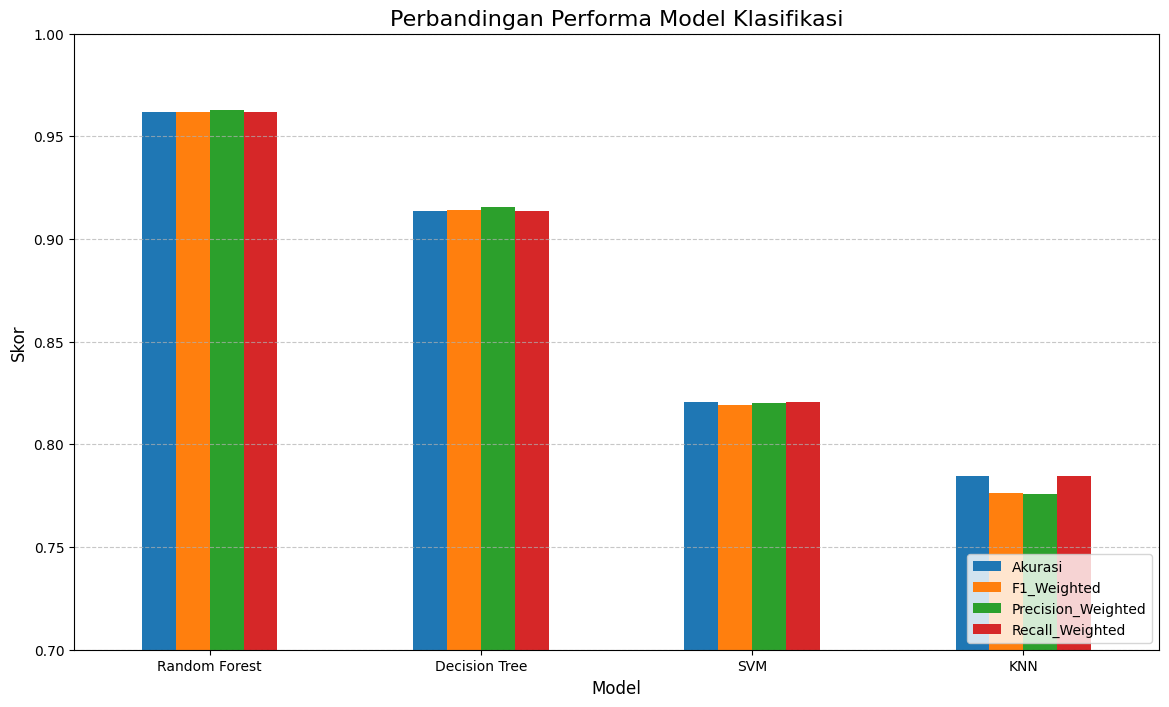

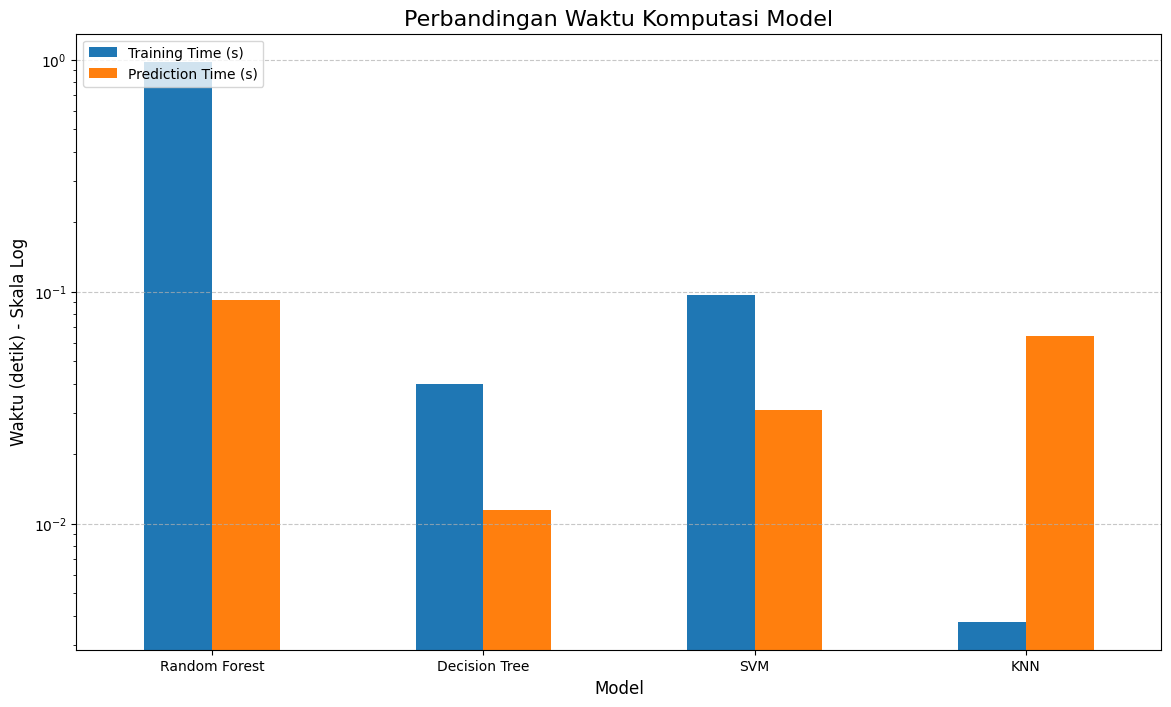

In [ ]:
#Membandingkan Performa Model
df_performance = pd.DataFrame(model_performance).T
df_performance = df_performance.sort_values(by='F1_Weighted', ascending=False)

print("Tabel Perbandingan Performa Model:")
display(df_performance)

df_performance[['Akurasi', 'F1_Weighted', 'Precision_Weighted', 'Recall_Weighted']].plot(kind='bar', figsize=(14, 8))
plt.title('Perbandingan Performa Model Klasifikasi', fontsize=16)
plt.ylabel('Skor', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.7, 1.0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_performance[['Training Time (s)', 'Prediction Time (s)']].plot(kind='bar', figsize=(14, 8), logy=True)
plt.title('Perbandingan Waktu Komputasi Model', fontsize=16)
plt.ylabel('Waktu (detik) - Skala Log', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Hyperparameter Tuning untuk model Random Forest
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

print("Grid Hyperparameter untuk Randomized Search:")
print(param_dist_rf)

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("\nMemulai Randomized Search CV untuk Random Forest...")
rf_random_search.fit(X_train, y_train)
print("Pencarian selesai.")

print("\nHyperparameter terbaik yang ditemukan:")
print(rf_random_search.best_params_)

print(f"\nSkor cross-validation terbaik (Akurasi): {rf_random_search.best_score_:.4f}")

Grid Hyperparameter untuk Randomized Search:
{'n_estimators': [100, 200, 300, 500], 'max_features': ['sqrt', 'log2', None], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}

Memulai Randomized Search CV untuk Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Pencarian selesai.

Hyperparameter terbaik yang ditemukan:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}

Skor cross-validation terbaik (Akurasi): 0.9318


Akurasi Random Forest (Tuned): 0.9641

Laporan Klasifikasi Random Forest (Tuned):
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        54
      Normal_Weight       0.88      1.00      0.93        57
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       1.00      0.98      0.99        59
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.94      0.91      0.93        55
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.96       418
          macro avg       0.97      0.96      0.96       418
       weighted avg       0.97      0.96      0.96       418



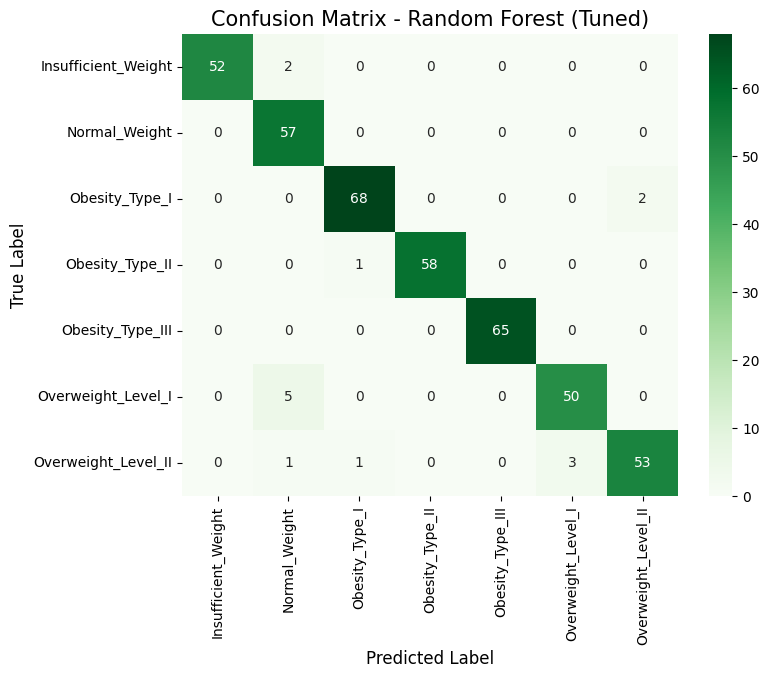

In [ ]:
#Melatih Model Random Forest yang sudah di tuning
best_rf_model = rf_random_search.best_estimator_

y_pred_rf_tuned = best_rf_model.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Akurasi Random Forest (Tuned): {accuracy_rf_tuned:.4f}")

print("\nLaporan Klasifikasi Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf_tuned, target_names=class_names_dt, zero_division=0))

model_performance['Random Forest (Tuned)'] = {
    'Akurasi': accuracy_rf_tuned,
    'F1_Macro': f1_score(y_test, y_pred_rf_tuned, average='macro', zero_division=0),
    'F1_Weighted': f1_score(y_test, y_pred_rf_tuned, average='weighted', zero_division=0),
    'Precision_Weighted': precision_score(y_test, y_pred_rf_tuned, average='weighted', zero_division=0),
    'Recall_Weighted': recall_score(y_test, y_pred_rf_tuned, average='weighted', zero_division=0)
}

cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=class_names_dt, yticklabels=class_names_dt)
plt.title('Confusion Matrix - Random Forest (Tuned)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

Tabel Perbandingan Performa Model (Termasuk Tuned Model):


,Akurasi,F1_Macro,F1_Weighted,Precision_Weighted,Recall_Weighted,Training Time (s),Prediction Time (s)
Random Forest (Tuned),0.964115,0.963203,0.964287,0.965939,0.964115,NaN,NaN
Random Forest,0.961722,0.960649,0.961909,0.962767,0.961722,0.978564,0.091697
Decision Tree,0.913876,0.912359,0.913931,0.915478,0.913876,0.039970,0.011384
SVM,0.820574,0.815192,0.819112,0.820219,0.820574,0.096419,0.030922
KNN,0.784689,0.770485,0.776324,0.775753,0.784689,0.003774,0.064612


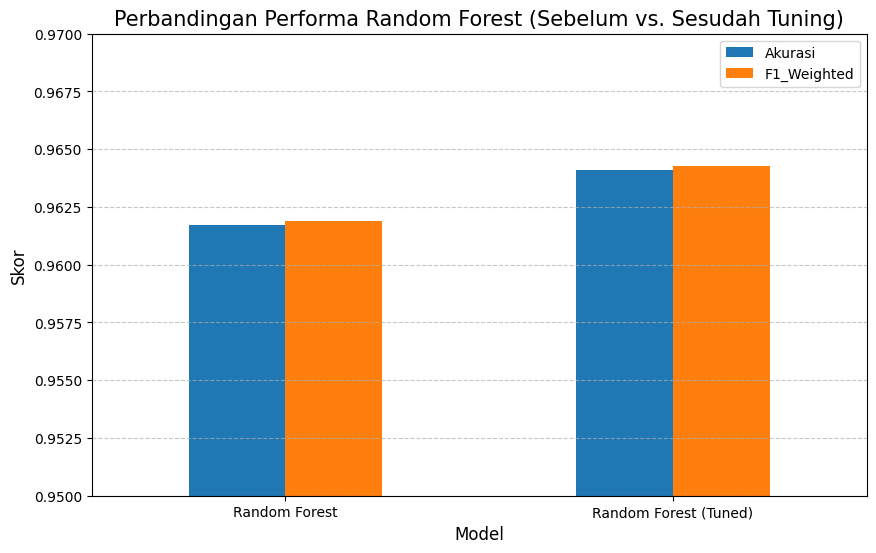

In [ ]:
#Membandingkan Performa Model
df_performance_final = pd.DataFrame(model_performance).T
df_performance_final = df_performance_final.sort_values(by='Akurasi', ascending=False)

print("Tabel Perbandingan Performa Model (Termasuk Tuned Model):")
display(df_performance_final)

rf_comparison = df_performance_final.loc[['Random Forest', 'Random Forest (Tuned)']]

rf_comparison[['Akurasi', 'F1_Weighted']].plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Performa Random Forest (Sebelum vs. Sesudah Tuning)', fontsize=15)
plt.ylabel('Skor', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.95, 0.97)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pentingnya Fitur dari Random Forest (Tuned):


,feature,importance
3,Weight,0.345204
2,Height,0.100479
6,FCVC,0.090824
0,Age,0.089255
1,Gender,0.053801
13,TUE,0.049309
10,CH2O,0.045858
12,FAF,0.045415
7,NCP,0.042049
14,CAEC,0.032089


<ipython-input-33-2535125398>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=df_importances, palette='viridis')


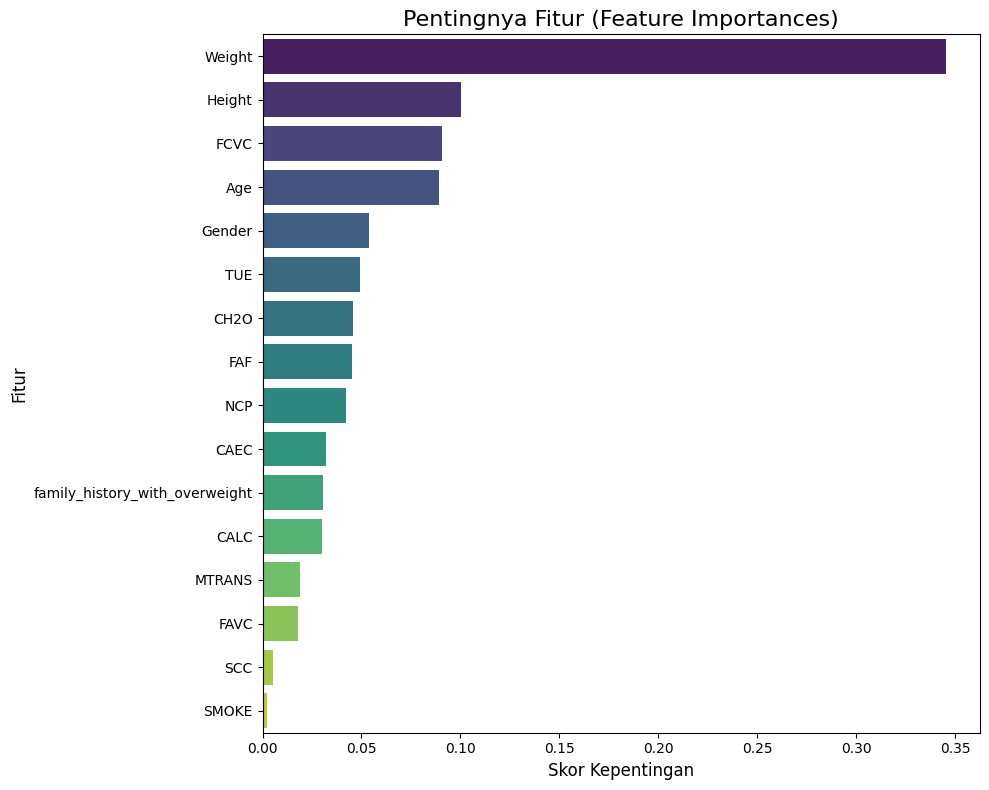

In [ ]:
#Feature Selection dengan Feature Importances
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

df_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Pentingnya Fitur dari Random Forest (Tuned):")
display(df_importances)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=df_importances, palette='viridis')
plt.title('Pentingnya Fitur (Feature Importances)', fontsize=16)
plt.xlabel('Skor Kepentingan', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Ambil 8 fitur teratas
selected_features_8 = df_importances['feature'].head(8).tolist()

print("8 Fitur Teratas yang Dipilih:")
print(selected_features_8)

X_train_selected_8 = X_train[selected_features_8]
X_test_selected_8 = X_test[selected_features_8]

print("\nDimensi data training baru (8 fitur):", X_train_selected_8.shape)
print("Dimensi data testing baru (8 fitur):", X_test_selected_8.shape)

8 Fitur Teratas yang Dipilih:
['Weight', 'Height', 'FCVC', 'Age', 'Gender', 'TUE', 'CH2O', 'FAF']

Dimensi data training baru (8 fitur): (1672, 8)
Dimensi data testing baru (8 fitur): (418, 8)


In [ ]:
#Latih ulang model dengan 8 fitur terpilih
rf_model_selected_features_8 = rf_random_search.best_estimator_

print("\nMelatih ulang model Random Forest pada 8 fitur terpilih...")
rf_model_selected_features_8.fit(X_train_selected_8, y_train)
print("Pelatihan selesai.")

y_pred_rf_selected_8 = rf_model_selected_features_8.predict(X_test_selected_8)

print("\n--- Evaluasi Random Forest (8 Fitur Terpilih) ---")
accuracy_rf_selected_8 = accuracy_score(y_test, y_pred_rf_selected_8)
print(f"Akurasi RF (8 Fitur): {accuracy_rf_selected_8:.4f}")

print("\nLaporan Klasifikasi RF (8 Fitur):")
print(classification_report(y_test, y_pred_rf_selected_8, target_names=class_names_dt, zero_division=0))

model_performance['Random Forest (8 Fitur)'] = {
    'Akurasi': accuracy_rf_selected_8,
    'F1_Macro': f1_score(y_test, y_pred_rf_selected_8, average='macro', zero_division=0),
    'F1_Weighted': f1_score(y_test, y_pred_rf_selected_8, average='weighted', zero_division=0)
}


Melatih ulang model Random Forest pada 8 fitur terpilih...
Pelatihan selesai.

--- Evaluasi Random Forest (8 Fitur Terpilih) ---
Akurasi RF (8 Fitur): 0.9617

Laporan Klasifikasi RF (8 Fitur):
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        54
      Normal_Weight       0.93      0.93      0.93        57
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       1.00      0.98      0.99        59
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.89      0.91      0.90        55
Overweight_Level_II       0.93      0.97      0.95        58

           accuracy                           0.96       418
          macro avg       0.96      0.96      0.96       418
       weighted avg       0.96      0.96      0.96       418



In [ ]:
#Menyimpan Model dan Scaler
import joblib

model_filename = 'obesity_model.joblib'
scaler_filename = 'scaler.joblib'

joblib.dump(rf_model_selected_features_8, model_filename)
print(f"Model telah disimpan ke file: {model_filename}")

joblib.dump(scaler, scaler_filename)
print(f"Scaler telah disimpan ke file: {scaler_filename}")

Model telah disimpan ke file: obesity_model.joblib
Scaler telah disimpan ke file: scaler.joblib


In [ ]:
#Mengambil nilai modus untuk fitur yang tidak dipilih
original_cols = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
                 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF',
                 'TUE', 'CAEC', 'MTRANS']
selected_features_8 = ['Weight', 'Height', 'FCVC', 'Age', 'Gender', 'TUE', 'CH2O', 'FAF']

cols_for_default = [col for col in original_cols if col not in selected_features_8]

print("Menghitung nilai default (modus) untuk kolom yang tidak diinput:")

default_values = X_train[cols_for_default].mode().iloc[0]

print(default_values.to_dict())

Menghitung nilai default (modus) untuk kolom yang tidak diinput:
{'CALC': 0.3333333333333333, 'FAVC': 1.0, 'NCP': 0.625, 'SCC': 0.0, 'SMOKE': 0.0, 'family_history_with_overweight': 1.0, 'CAEC': 0.3333333333333333, 'MTRANS': 0.75}


## Kesimpulan

### Kesimpulan Tahap 1: Exploratory Data Analysis (EDA)

Tujuan:
Tujuan dari tahap Analisis Data Eksploratif (EDA) adalah untuk memahami karakteristik, struktur, kualitas, dan pola dasar dari dataset Obesitas.

Proses yang Dilakukan:
1.  Memuat dataset dan memeriksa informasi dasar seperti jumlah baris (2111), kolom (17), dan tipe data awal (semua terdeteksi sebagai object).
2.  Melakukan analisis statistik deskriptif untuk mendapatkan gambaran umum nilai-nilai dalam data.
3.  Memeriksa nilai unik (unique values) di setiap kolom untuk mengidentifikasi kategori dan potensi anomali.
4.  Melakukan visualisasi distribusi untuk setiap fitur menggunakan histogram dan boxplot (untuk numerik) serta bar chart (untuk kategorikal).
5.  Menganalisis distribusi kelas target (NObeyesdad) untuk memeriksa keseimbangan kelas.

Temuan Utama:
1.  Kualitas Data: Ditemukan adanya masalah kualitas data yang signifikan, termasuk adanya nilai yang hilang (ditandai dengan ? dan nan), serta tipe data yang tidak sesuai di mana kolom numerik terdeteksi sebagai object.
2.  Artefak Data Sintetis: Beberapa fitur numerik seperti Age, Height, Weight, FCVC, NCP, CH2O, FAF, dan TUE mengandung nilai float dengan presisi tinggi dan nilai maksimum yang tidak realistis (misalnya, Weight hingga 441 kg, Height hingga 2.85 m). Ini diidentifikasi sebagai kemungkinan artefak dari proses pembuatan data sintetis menggunakan SMOTE.
3.  Outlier: Boxplot secara visual mengkonfirmasi keberadaan banyak outlier ekstrem pada fitur-fitur numerik tersebut.
4.  Keseimbangan Kelas: Dataset menunjukkan sedikit ketidakseimbangan antar 7 kelas target, meskipun tidak ekstrem.

Tindakan Lanjutan:
Berdasarkan temuan ini, diputuskan bahwa dataset memerlukan serangkaian langkah preprocessing yang komprehensif sebelum dapat digunakan untuk pemodelan. Langkah-langkah ini meliputi penanganan nilai yang hilang, konversi tipe data, penanganan outlier, penghapusan duplikat, dan encoding fitur kategorikal.

---

### Kesimpulan Tahap 2: Preprocessing Data

Tujuan:
Tujuan dari tahap Preprocessing Data adalah untuk membersihkan, mentransformasi, dan menyiapkan data yang telah dianalisis pada tahap EDA menjadi format yang bersih, konsisten, dan optimal untuk dilatih oleh model machine learning.

Proses yang Dilakukan:
1.  Pembersihan Data: Semua penanda nilai hilang (?) diganti menjadi format standar np.nan.
2.  Penanganan Outlier: Outlier pada semua fitur numerik ditangani menggunakan metode capping berdasarkan Interquartile Range (IQR) dengan faktor 1.5. Ini berhasil membawa nilai-nilai ekstrem ke dalam rentang yang lebih masuk akal.
3.  Imputasi Missing Values: Nilai np.nan yang tersisa diimputasi menggunakan median untuk fitur numerik (robust terhadap sisa-sisa outlier) dan modus untuk fitur kategorikal (pendekatan standar).
4.  Penanganan Duplikat: Sebanyak 21 baris data duplikat ditemukan dan dihapus dari dataset.
5.  Encoding Fitur: Semua fitur kategorikal diubah menjadi representasi numerik menggunakan Label Encoding. Fitur ordinal seperti CALC dan CAEC di-encode menggunakan pemetaan manual untuk menjaga urutannya.
6.  Normalisasi Data: Semua fitur numerik dinormalisasi ke rentang 0-1 menggunakan MinMaxScaler untuk memastikan semua fitur memiliki skala yang sebanding.

Tindakan Lanjutan:
Setelah melalui seluruh proses preprocessing, dataset kini sepenuhnya numerik, tidak memiliki nilai yang hilang, tidak ada duplikat, dan semua fiturnya telah dinormalisasi. Data ini (dipisahkan menjadi X_scaled dan y) dianggap siap untuk tahap pemodelan dan evaluasi.

---

### Kesimpulan Tahap 3: Pemodelan dan Evaluasi

Tujuan:
Tujuan dari tahap ini adalah untuk melatih beberapa model klasifikasi yang berbeda sebagai baseline, mengevaluasi performanya secara komprehensif, dan membandingkannya untuk mengidentifikasi model kandidat terbaik.

Proses yang Dilakukan:
1.  Data dibagi menjadi set pelatihan (80%) dan set pengujian (20%) menggunakan train_test_split dengan stratifikasi (stratify=y).
2.  Empat model klasifikasi dilatih: Decision Tree, Random Forest, K-Nearest Neighbors (KNN), dan Support Vector Machine (SVM).
3.  Setiap model dievaluasi pada set pengujian menggunakan metrik akurasi, presisi, recall, F1-score, dan confusion matrix.
4.  Performa dan waktu komputasi dari keempat model dibandingkan menggunakan tabel dan visualisasi bar chart.

Temuan Utama:
1.  Random Forest Classifier menunjukkan performa terbaik secara signifikan dengan akurasi 96.17% dan F1-score tertimbang 0.96.
2.  Decision Tree Classifier menjadi model terbaik kedua dengan performa yang solid (akurasi 91.39%).
3.  SVM dan KNN menunjukkan performa yang lebih rendah (akurasi 82.06% dan 78.47%), dengan KNN mengalami kesulitan terbesar dalam membedakan kelas-kelas yang berdekatan seperti Normal_Weight.
4.  Dalam hal waktu komputasi, Decision Tree adalah yang tercepat, sementara Random Forest membutuhkan waktu pelatihan paling lama.

Tindakan Lanjutan:
Berdasarkan performa akurasi dan F1-score yang superior, Random Forest Classifier dipilih sebagai model terbaik untuk dilanjutkan ke tahap optimasi (Hyperparameter Tuning).

---

### Kesimpulan Tahap 4: Hyperparameter Tuning & Feature Selection

Tujuan:
Tujuan tahap ini adalah untuk mengoptimalkan hyperparameter dari model Random Forest untuk mendapatkan performa terbaik, serta menyederhanakan model untuk tujuan deployment praktis.

Proses yang Dilakukan:
1.  Hyperparameter Tuning: RandomizedSearchCV dengan 5-fold cross-validation digunakan untuk mencari kombinasi hyperparameter terbaik untuk model Random Forest.
2.  Evaluasi Model Tuned: Model dengan hyperparameter terbaik dievaluasi kembali pada test set. Hasilnya menunjukkan sedikit peningkatan akurasi menjadi 96.41%.
3.  Feature Selection: Berdasarkan pertimbangan untuk aplikasi deployment yang ramah pengguna, dilakukan analisis feature_importances_ dari model yang telah di-tuning.
4.  Pelatihan Ulang: Diputuskan untuk memilih 8 fitur teratas (Weight, Height, FCVC, Age, Gender, TUE, CH2O, FAF) dan melatih ulang model Random Forest dengan parameter terbaik pada set fitur yang lebih kecil ini.

Temuan Utama:
1.  Model yang dilatih ulang hanya dengan 8 fitur teratas mencapai akurasi 96.17%, sebuah penurunan performa yang sangat minimal dibandingkan dengan model yang menggunakan 16 fitur.
2.  Ini membuktikan bahwa 8 fitur yang dibuang memiliki kontribusi yang sangat kecil dan dapat dihilangkan tanpa mengorbankan performa secara signifikan.

Tindakan Lanjutan:
Model Random Forest yang telah di-tuning dan dilatih ulang pada 8 fitur terpilih ditetapkan sebagai model final. Model ini menawarkan kombinasi terbaik antara performa akurasi yang sangat tinggi dan kepraktisan untuk implementasi dalam aplikasi pengguna.

---

### Kesimpulan Akhir Proyek

Proyek Capstone ini bertujuan untuk membangun model machine learning yang mampu memprediksi tingkat obesitas individu berdasarkan kebiasaan makan dan kondisi fisik. Melalui serangkaian proses yang sistematis, mulai dari analisis data eksploratif, preprocessing data yang mendalam, hingga pemodelan dan optimasi, proyek ini berhasil mencapai tujuannya.

Setelah melalui pembersihan data yang komprehensif—termasuk penanganan outlier, imputasi nilai yang hilang, dan penghapusan duplikat—empat model klasifikasi (Decision Tree, Random Forest, KNN, SVM) dievaluasi. Random Forest Classifier terbukti sebagai model paling unggul. Proses optimasi lebih lanjut melalui Hyperparameter Tuning dan Feature Selection yang berorientasi pada kemudahan penggunaan aplikasi menghasilkan model final yang optimal.

Model final yang dipilih adalah Random Forest Classifier yang telah di-tuning, yang dilatih hanya menggunakan 8 fitur paling penting: Weight, Height, FCVC, Age, Gender, TUE, CH2O, dan FAF. Model ini berhasil mencapai akurasi sebesar 96.17% pada data uji, menunjukkan performa yang sangat tinggi dan andal. Dengan mengurangi jumlah fitur input dari 16 menjadi 8 tanpa penurunan performa yang berarti, model ini tidak hanya akurat tetapi juga praktis untuk diimplementasikan dalam aplikasi web interaktif bagi pengguna akhir.
